# <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:#15C3BA'>1 ❯</span></b> <b>BACKGROUND</b></div>

https://www.kaggle.com/code/shtrausslearning/customer-transaction-predictive-analytics

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>Customer Financial Transactions</b>
* This project is conducted utilizing the transaction dataset of <span style='color:#15C3BA'><b>ANZ</b></span>, <b>an Australia financial company</b>.
* The dataset covers the transactions occurring within <span style='color:#15C3BA'><b>3 months</b></span> <b>(August, September, and October)</b> of <span style='color:#15C3BA'><b>  100 customers </b></span>.
* The transactions contains information related to <span style='color:#15C3BA'><b>purchases, salary payments, and frequency of transactions based on time</b></span>.

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>Tasks</b>

#### <b>Task 1: Customer Personas</b>
* Customer portfolios can be built based on available information provided in the dataset, such as age, gender, number of accounts per customer, and locations where transactions occurred.

#### <b>Task 2: Customer Purchase Behaviors</b>
* Spot out the spending patterns of customers crossing time (hours, days of week, and month) and age groups
* Identify the differences between genders in their sending patterns, associated with time

#### <b>Task 3: Salary Payments of Customers</b>
* Spot out the salary trend of 100 customers
* Identify the abnormal and normal salary payments during three months
* Estimate the annual salary of customers by using the average amount of salary of three months
* Plot the salary distribution of all customers during a year

# <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:#15C3BA'>2 ❯</span></b> <b>SET-UP</b></div>

# <b><span style = 'color:#15C3BA; text-align:center'>2.1 ❯</span> Libraries</b>

In [5]:
import pandas as pd
import numpy as np
import missingno as msno

# libraries for visualization
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected = True)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings('ignore')

## <b><span style = 'color:#15C3BA; text-align:center'>❯❯</span> Library Installation</b>

```python
pip install missingno
```

# <b><span style = 'color:#15C3BA'>2.2 ❯</span> Dataset</b>

## <b><span style = 'color:#15C3BA; text-align:center'>❯❯</span> Original version</b>

In [92]:
path = "https://raw.githubusercontent.com/BatterieNguyen/Customer_Transactions_Analysis/refs/heads/main/anz_raw.csv"
anz = pd.read_csv(path)

## <b><span style = 'color:#15C3BA; text-align:center'>❯❯</span> Updated version</b>

In [7]:
path = "https://raw.githubusercontent.com/BatterieNguyen/Customer_Transactions_Analysis/refs/heads/main/anz_updated.csv"
anz_updated = pd.read_csv(path)

## <b><span style = 'color:#15C3BA; text-align:center'>❯❯</span> Annual Salary Data</b>

In [8]:
path = "https://raw.githubusercontent.com/BatterieNguyen/Customer_Transactions_Analysis/refs/heads/main/anz_salary.csv"
anz_salary = pd.read_csv(path)

# <b><span style = 'color:#15C3BA'>2.3 ❯</span> Data Acquisition</b>

In [5]:
print("Below is the first 20 rows of the dataframe")
anz.head(10)

Below is the first 20 rows of the dataframe


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [41]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [21]:
anz.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [25]:
anz.describe(include = "object").T

,count,unique,top,freq
status,12043,2,authorized,7717
bpay_biller_code,885,3,0,883
account,12043,100,ACC-1598451071,578
currency,12043,1,AUD,12043
long_lat,12043,100,153.41 -27.95,578
txn_description,12043,6,SALES-POS,3934
merchant_id,7717,5725,106e1272-44ab-4dcb-a438-dd98e0071e51,14
first_name,12043,80,Michael,746
date,12043,91,9/28/2018,174
gender,12043,2,M,6285


# <div style="padding: 20px;  color:white; margin:0; font-size: 70%; text-align:left; display:fill; border-radius: 10px; overflow: hidden; background-color:#2DA19B"> <b> Conclusion</b></div>

There are some features of the dataframe that are inappropriate, causing difficulties for further analyzing process. So, they need to be adjusted.
<ul>
    <li>The column <b>merchant_long_lat</b> and <b>long_lat</b> should be splitted into 2 columns: longtitude and lattitde.</li>
    <li>The column <b>extraction</b> and <b>date</b> would be converted from object type into datetime64.</li>
    <li>A new column, <b>Age_group</b> will be created.</li>
    <li><b>bpay_biller_code</b> and <b>merchant_code</b> are columns having missing values the most.</li>
    <li><b>country</b> and <b>currency</b> are informative columns as they contains one value only, "Australia" and "AUD" respectively (Only domestic transactions are included)</li>
</ul>

# <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:#15C3BA'>3 ❯</span></b> <b>DATA WRANGLING</b></div>

# <b><span style = 'color:#15C3BA'>3.1 ❯</span> Feature Adjustment</b>

## <b><span style = 'color:#15C3BA'>❯❯</span> Location Data</b>

In [94]:
loc = anz['merchant_long_lat'].str.split(' ', expand = True)
loc.columns = ['merchant_longitude', 'merchant_latitude']

pur_loc = anz["long_lat"].str.split(' ', expand = True)
pur_loc.columns = ['purchase_longitude', 'purchase_latitude']

In [96]:
# Concatenate 2 new dataframes with the original one
anz_updated = pd.concat([anz, loc, pur_loc], axis = 1)
anz_updated = anz_updated.drop(["merchant_long_lat", "long_lat"], axis = 1)

* Or
```python
anz_updated['date'] = anz['date'].astype('datetime64[ns]')
```

## <b><span style = 'color:#15C3BA'>❯❯</span> Bining The Age</b>

The age range of payers is between 18 and 78.

In [98]:
anz_updated["age"].value_counts().sort_index

<bound method Series.sort_index of age
26    893
38    767
20    765
21    733
24    732
40    704
19    693
34    537
25    515
30    499
43    473
35    444
27    443
18    442
28    414
22    399
23    309
39    283
37    276
31    255
42    232
44    160
46    153
33    139
29    134
41    121
47    110
69    102
64     88
52     77
53     73
50     44
78     34
Name: count, dtype: int64>

In [100]:
# Label the na-me for each age group
age_groups = ['18-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70>']

# Divide ages into groups
anz_updated["age_group"] = pd.cut(anz_updated["age"], [0, 20, 30, 40, 50, 60, 70, 150], labels = age_groups)

In [80]:
anz_updated[["age", "age_group"]].head()

,age,age_group
0,26,21-30
1,26,21-30
2,38,31-40
3,40,31-40
4,26,21-30


In [102]:
anz_updated.sort_index(axis = 1)

,account,age,age_group,amount,balance,bpay_biller_code,card_present_flag,country,currency,customer_id,...,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,purchase_latitude,purchase_longitude,status,transaction_id,txn_description
0,ACC-1598451071,26,21-30,16.25,35.39,NaN,1.0,Australia,AUD,CUS-2487424745,...,-27.99,153.38,QLD,Ashmore,debit,-27.95,153.41,authorized,a623070bfead4541a6b0fff8a09e706c,POS
1,ACC-1598451071,26,21-30,14.19,21.20,NaN,0.0,Australia,AUD,CUS-2487424745,...,-33.87,151.21,NSW,Sydney,debit,-27.95,153.41,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS
2,ACC-1222300524,38,31-40,6.42,5.71,NaN,1.0,Australia,AUD,CUS-2142601169,...,-33.87,151.21,NSW,Sydney,debit,-33.94,151.23,authorized,feb79e7ecd7048a5a36ec889d1a94270,POS
3,ACC-1037050564,40,31-40,40.90,2117.22,NaN,1.0,Australia,AUD,CUS-1614226872,...,-26.68,153.05,QLD,Buderim,debit,-27.66,153.10,authorized,2698170da3704fd981b15e64a006079e,SALES-POS
4,ACC-1598451071,26,21-30,3.25,17.95,NaN,1.0,Australia,AUD,CUS-2487424745,...,-28.06,153.44,QLD,Mermaid Beach,debit,-27.95,153.41,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,ACC-3021093232,30,21-30,9.79,14054.14,NaN,0.0,Australia,AUD,CUS-55310383,...,-37.81,145.23,VIC,Ringwood,debit,-29.47,149.83,authorized,f2e3e695c2ee4c50a4c8747f852cbe2e,POS
12039,ACC-1608363396,20,18-20,63.87,9137.79,NaN,1.0,Australia,AUD,CUS-2688605418,...,-33.96,150.88,NSW,Casula,debit,-33.87,151.22,authorized,56e147e5485f4683b9076fcaaed76640,SALES-POS
12040,ACC-3827517394,28,21-30,43.96,45394.57,NaN,1.0,Australia,AUD,CUS-2663907001,...,-33.74,150.92,NSW,Kings Park,debit,-33.89,151.12,authorized,2fdd4681827343f6af2e6519644a684a,POS
12041,ACC-2920611728,69,61-70,30.77,11350.67,NaN,1.0,Australia,AUD,CUS-1388323263,...,-37.91,145.09,VIC,Oakleigh,debit,-37.76,144.96,authorized,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,SALES-POS


In [65]:
anz_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   account             12043 non-null  object             
 1   age                 12043 non-null  int64              
 2   age_group           12043 non-null  category           
 3   amount              12043 non-null  float64            
 4   balance             12043 non-null  float64            
 5   bpay_biller_code    885 non-null    object             
 6   card_present_flag   7717 non-null   float64            
 7   country             12043 non-null  object             
 8   currency            12043 non-null  object             
 9   customer_id         12043 non-null  object             
 10  date                12043 non-null  datetime64[ns]     
 11  extraction          12043 non-null  datetime64[ns, UTC]
 12  first_name          12043 non-nu

## <b><span style = 'color:#15C3BA'>❯❯</span> Time Data</b>

In [104]:
anz_updated[["extraction", "date"]].head()

,extraction,date
0,2018-08-01T01:01:15.000+0000,8/1/2018
1,2018-08-01T01:13:45.000+0000,8/1/2018
2,2018-08-01T01:26:15.000+0000,8/1/2018
3,2018-08-01T01:38:45.000+0000,8/1/2018
4,2018-08-01T01:51:15.000+0000,8/1/2018


In [106]:
# Convert datatype of "extraction" (2018-08-01T01:01:15.000+0000) and 'date' (8/1/2018) to datetime64
anz_updated["extraction"] = pd.to_datetime(anz_updated["extraction"])
anz_updated["date"] = pd.to_datetime(anz_updated["date"])
anz_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   status              12043 non-null  object             
 1   card_present_flag   7717 non-null   float64            
 2   bpay_biller_code    885 non-null    object             
 3   account             12043 non-null  object             
 4   currency            12043 non-null  object             
 5   txn_description     12043 non-null  object             
 6   merchant_id         7717 non-null   object             
 7   merchant_code       883 non-null    float64            
 8   first_name          12043 non-null  object             
 9   balance             12043 non-null  float64            
 10  date                12043 non-null  datetime64[ns]     
 11  gender              12043 non-null  object             
 12  age                 12043 non-nu

In [108]:
# Extract time-baed data into separated columns regard to year, month, day, day of week, hour, minute
year = anz_updated["extraction"].dt.year
month = anz_updated["extraction"].dt.month
day = anz_updated["extraction"].dt.day
dow = anz_updated["extraction"].dt.dayofweek
hour = anz_updated["extraction"].dt.hour
minute = anz_updated["extraction"].dt.minute

# Label the values of "day of week" by creating a dictionarqy to map numeric values to categorical ones
day_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
dow = dow.map(day_of_week)

# Create time-component dataframe by concatenating
time_components = pd.concat([year, month, day, dow, hour, minute], axis = 1)
time_components.columns = ["year", "month", "day", "day_of_week", "hour", "minute"]

# Add time_component dataframe to the original one
anz_updated = pd.concat([anz_updated, time_components], axis = 1)

# Drop the "extraction" column
anz_updated = anz_updated.drop(["extraction"], axis = 1)

In [110]:
anz_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   status              12043 non-null  object        
 1   card_present_flag   7717 non-null   float64       
 2   bpay_biller_code    885 non-null    object        
 3   account             12043 non-null  object        
 4   currency            12043 non-null  object        
 5   txn_description     12043 non-null  object        
 6   merchant_id         7717 non-null   object        
 7   merchant_code       883 non-null    float64       
 8   first_name          12043 non-null  object        
 9   balance             12043 non-null  float64       
 10  date                12043 non-null  datetime64[ns]
 11  gender              12043 non-null  object        
 12  age                 12043 non-null  int64         
 13  merchant_suburb     7717 non-null   object    

# <b><span style = 'color:#15C3BA'>3.2 ❯</span> Cleaning Data</b>

## <b><span style = 'color:#15C3BA'>❯❯</span> Identify missing values</b>

In [83]:
anz_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   account             12043 non-null  object        
 1   age                 12043 non-null  int64         
 2   age_group           12043 non-null  category      
 3   amount              12043 non-null  float64       
 4   balance             12043 non-null  float64       
 5   bpay_biller_code    885 non-null    object        
 6   card_present_flag   7717 non-null   float64       
 7   country             12043 non-null  object        
 8   currency            12043 non-null  object        
 9   customer_id         12043 non-null  object        
 10  date                12043 non-null  datetime64[ns]
 11  first_name          12043 non-null  object        
 12  gender              12043 non-null  object        
 13  merchant_code       883 non-null    float64   

In [85]:
null_cols = ["bpay_biller_code", "merchant_code", "merchant_id", "card_present_flag", 
             "merchant_state", "merchant_suburb", "merchant_longitude", "merchant_latitude"]

In [87]:
for col in null_cols:
    print(f"The number of null values in {col} is: ", anz_updated[col].isnull().sum())
    print('')

The number of null values in bpay_biller_code is:  11158

The number of null values in merchant_code is:  11160

The number of null values in merchant_id is:  4326

The number of null values in card_present_flag is:  4326

The number of null values in merchant_state is:  4326

The number of null values in merchant_suburb is:  4326

The number of null values in merchant_longitude is:  4326

The number of null values in merchant_latitude is:  4326



<b><i> Create a function to identify values of other attributes where the null value is</i></b>

In [27]:
def identify_missing(col1):
    df = anz_updated.loc[anz_updated[col1].isnull()]
    for col2 in df.columns:
        print(f"The value counts of {col2} where value of {col1} is null: ", df[col2].value_counts())
        print('\n', '-'*79, '\n')

In [29]:
identify_missing("bpay_biller_code")

The value counts of status where value of bpay_biller_code is null:  status
authorized    7715
posted        3443
Name: count, dtype: int64

 ------------------------------------------------------------------------------- 

The value counts of card_present_flag where value of bpay_biller_code is null:  card_present_flag
1.0    6192
0.0    1523
Name: count, dtype: int64

 ------------------------------------------------------------------------------- 

The value counts of bpay_biller_code where value of bpay_biller_code is null:  Series([], Name: count, dtype: int64)

 ------------------------------------------------------------------------------- 

The value counts of account where value of bpay_biller_code is null:  account
ACC-1598451071    564
ACC-1222300524    290
ACC-182446574     285
ACC-4258502723    247
ACC-1037050564    246
                 ... 
ACC-2988263882     32
ACC-3881031190     25
ACC-4059612845     24
ACC-1217063613     23
ACC-721712940      22
Name: count, Length: 10

In [31]:
identify_missing("merchant_code")

The value counts of status where value of merchant_code is null:  status
authorized    7717
posted        3443
Name: count, dtype: int64

 ------------------------------------------------------------------------------- 

The value counts of card_present_flag where value of merchant_code is null:  card_present_flag
1.0    6194
0.0    1523
Name: count, dtype: int64

 ------------------------------------------------------------------------------- 

The value counts of bpay_biller_code where value of merchant_code is null:  bpay_biller_code
THE DISCOUNT CHEMIST GROUP              1
LAND WATER & PLANNING East Melbourne    1
Name: count, dtype: int64

 ------------------------------------------------------------------------------- 

The value counts of account where value of merchant_code is null:  account
ACC-1598451071    564
ACC-1222300524    290
ACC-182446574     285
ACC-4258502723    247
ACC-1037050564    246
                 ... 
ACC-2988263882     32
ACC-3881031190     25
ACC-40596128

In [100]:
identify_missing("merchant_id")

The value counts of account where value of merchant_id is null:  account
ACC-3827517394    103
ACC-37709441       90
ACC-1496451953     90
ACC-1349834573     85
ACC-3485804958     82
                 ... 
ACC-80388494       15
ACC-2674800293     13
ACC-53508546       13
ACC-1424176027     13
ACC-1217063613     11
Name: count, Length: 100, dtype: int64

The value counts of age where value of merchant_id is null:  age
19    274
40    274
21    262
20    235
38    213
35    206
43    197
26    192
34    186
18    182
22    174
24    174
28    172
23    169
25    147
39    138
30    135
42    132
27    127
46    101
31     97
44     72
37     69
29     67
47     58
69     49
41     49
33     43
52     34
78     31
64     29
53     25
50     13
Name: count, dtype: int64

The value counts of age_group where value of merchant_id is null:  age_group
20-30    1619
31-40    1226
<20       691
41-50     622
61-70      78
51-60      59
70>        31
Name: count, dtype: int64

The value counts of a

In [104]:
identify_missing("card_present_flag")

The value counts of account where value of card_present_flag is null:  account
ACC-3827517394    103
ACC-37709441       90
ACC-1496451953     90
ACC-1349834573     85
ACC-3485804958     82
                 ... 
ACC-80388494       15
ACC-2674800293     13
ACC-53508546       13
ACC-1424176027     13
ACC-1217063613     11
Name: count, Length: 100, dtype: int64

The value counts of age where value of card_present_flag is null:  age
19    274
40    274
21    262
20    235
38    213
35    206
43    197
26    192
34    186
18    182
22    174
24    174
28    172
23    169
25    147
39    138
30    135
42    132
27    127
46    101
31     97
44     72
37     69
29     67
47     58
69     49
41     49
33     43
52     34
78     31
64     29
53     25
50     13
Name: count, dtype: int64

The value counts of age_group where value of card_present_flag is null:  age_group
20-30    1619
31-40    1226
<20       691
41-50     622
61-70      78
51-60      59
70>        31
Name: count, dtype: int64

The

In [106]:
identify_missing("merchant_state")

The value counts of account where value of merchant_state is null:  account
ACC-3827517394    103
ACC-37709441       90
ACC-1496451953     90
ACC-1349834573     85
ACC-3485804958     82
                 ... 
ACC-80388494       15
ACC-2674800293     13
ACC-53508546       13
ACC-1424176027     13
ACC-1217063613     11
Name: count, Length: 100, dtype: int64

The value counts of age where value of merchant_state is null:  age
19    274
40    274
21    262
20    235
38    213
35    206
43    197
26    192
34    186
18    182
22    174
24    174
28    172
23    169
25    147
39    138
30    135
42    132
27    127
46    101
31     97
44     72
37     69
29     67
47     58
69     49
41     49
33     43
52     34
78     31
64     29
53     25
50     13
Name: count, dtype: int64

The value counts of age_group where value of merchant_state is null:  age_group
20-30    1619
31-40    1226
<20       691
41-50     622
61-70      78
51-60      59
70>        31
Name: count, dtype: int64

The value co

In [108]:
identify_missing("merchant_suburb")

The value counts of account where value of merchant_suburb is null:  account
ACC-3827517394    103
ACC-37709441       90
ACC-1496451953     90
ACC-1349834573     85
ACC-3485804958     82
                 ... 
ACC-80388494       15
ACC-2674800293     13
ACC-53508546       13
ACC-1424176027     13
ACC-1217063613     11
Name: count, Length: 100, dtype: int64

The value counts of age where value of merchant_suburb is null:  age
19    274
40    274
21    262
20    235
38    213
35    206
43    197
26    192
34    186
18    182
22    174
24    174
28    172
23    169
25    147
39    138
30    135
42    132
27    127
46    101
31     97
44     72
37     69
29     67
47     58
69     49
41     49
33     43
52     34
78     31
64     29
53     25
50     13
Name: count, dtype: int64

The value counts of age_group where value of merchant_suburb is null:  age_group
20-30    1619
31-40    1226
<20       691
41-50     622
61-70      78
51-60      59
70>        31
Name: count, dtype: int64

The value

## <b><span style = 'color:#15C3BA'>❯❯</span> Dropping uninformative columns</b>

In [112]:
# Drop column which has a lot of null values
anz_updated = anz_updated.drop(["bpay_biller_code"], axis = 1)

# Drop columns which have only one distinct value
anz_updated = anz_updated.drop(["country", "currency"], axis = 1)

In [114]:
anz_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   status              12043 non-null  object        
 1   card_present_flag   7717 non-null   float64       
 2   account             12043 non-null  object        
 3   txn_description     12043 non-null  object        
 4   merchant_id         7717 non-null   object        
 5   merchant_code       883 non-null    float64       
 6   first_name          12043 non-null  object        
 7   balance             12043 non-null  float64       
 8   date                12043 non-null  datetime64[ns]
 9   gender              12043 non-null  object        
 10  age                 12043 non-null  int64         
 11  merchant_suburb     7717 non-null   object        
 12  merchant_state      7717 non-null   object        
 13  amount              12043 non-null  float64   

In [118]:
anz_updated.head()

,status,card_present_flag,account,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,...,merchant_latitude,purchase_longitude,purchase_latitude,age_group,year,month,day,day_of_week,hour,minute
0,authorized,1.0,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,...,-27.99,153.41,-27.95,21-30,2018,8,1,Wednesday,1,1
1,authorized,0.0,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,...,-33.87,153.41,-27.95,21-30,2018,8,1,Wednesday,1,13
2,authorized,1.0,ACC-1222300524,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,...,-33.87,151.23,-33.94,31-40,2018,8,1,Wednesday,1,26
3,authorized,1.0,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,...,-26.68,153.10,-27.66,31-40,2018,8,1,Wednesday,1,38
4,authorized,1.0,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,...,-28.06,153.41,-27.95,21-30,2018,8,1,Wednesday,1,51


# <div style="padding: 20px;  color:white; margin:0; font-size: 70%; text-align:left; display:fill; border-radius: 10px; overflow: hidden; background-color:#2DA19B"> <b> Conclusion</b></div>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span>Where <b>bpay_biller_code</b> and <b>merchant_code</b> avalues are null, </b>

* The value of <b>merchant_code</b> and <b>bpay_biller_code</b> values are null <u><i>at the same time</i></u>.
* There is no "PAY/SALARY" in the <b>txn_description</b> of <b>bpay_biller_code</b> and <b>merchant_code</b> column.

<hr>
<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span></b> Where <b>bpay_biller_code</b> and <b>merchant_code</b> avalues are 0, "merchant_id", "card_present_flag", "merchant_state" values are null.

<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span></b> Where <b>"merchant_id", "card_present_flag", "merchant_state"</b> are null, there is no "SALES-POS" and "POS" presented in the "txn_description" column.

# <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:#15C3BA'>4 ❯</span></b> <b>DATA PROFILING</b></div>

In [44]:
anz_updated.shape

(12043, 28)

In [40]:
anz_updated.describe()

,age,amount,balance,card_present_flag,day,hour,merchant_code,merchant_latitude,merchant_longitude,minute,month,purchase_latitude,purchase_longitude,year
count,12043.000000,12043.000000,12043.000000,7717.000000,12043.000000,12043.000000,883.0,7717.000000,7717.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.0
mean,30.582330,187.933588,14704.195553,0.802644,15.862908,13.268621,0.0,-32.752651,143.433277,19.009632,9.011957,-38.164347,143.648563,2018.0
std,10.046343,592.599934,31503.722652,0.398029,8.899598,5.777284,0.0,5.282423,12.090074,19.879112,0.816511,54.622791,16.669352,0.0
min,18.000000,0.100000,0.240000,0.000000,1.000000,0.000000,0.0,-43.310000,113.830000,0.000000,8.000000,-573.000000,114.620000,2018.0
25%,22.000000,16.000000,3158.585000,1.000000,8.000000,9.000000,0.0,-37.710000,144.680000,0.000000,8.000000,-37.700000,138.690000,2018.0
50%,28.000000,29.000000,6432.010000,1.000000,16.000000,13.000000,0.0,-33.840000,145.830000,13.000000,9.000000,-33.890000,145.230000,2018.0
75%,38.000000,53.655000,12465.945000,1.000000,24.000000,18.000000,0.0,-29.440000,151.210000,36.000000,10.000000,-30.750000,151.220000,2018.0
max,78.000000,8835.980000,267128.520000,1.000000,31.000000,23.000000,0.0,-12.330000,153.610000,59.000000,10.000000,-12.370000,255.000000,2018.0


## <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>Value Distinction</b>

In [52]:
merchant = [m for m in list(anz_updated.columns) if "merchant" in m]

for i in merchant:
    print(f"Feature: {i}")
    display(anz_updated[i].value_counts())
    print('\n', '-'*80, '\n')

Features: merchant_code


merchant_code
0.0    883
Name: count, dtype: int64


 -------------------------------------------------------------------------------- 

Features: merchant_id


merchant_id
106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
5c011d61-fbbe-437f-9ffa-3d9910cd2c7a     1
9eff6ea8-061d-4e88-93a5-6711962d80ed     1
7747bd2b-e29e-486f-b6aa-ad20ec5f6971     1
a851a118-cfad-4232-8dec-f528125fc2a1     1
e5975ab4-08f7-4725-a369-24cc0e35ed6e     1
Name: count, Length: 5725, dtype: int64


 -------------------------------------------------------------------------------- 

Features: merchant_latitude


merchant_latitude
-37.82    232
-33.87    218
-37.81    201
-37.83    148
-27.47    106
         ... 
-32.42      1
-42.84      1
-32.32      1
-36.11      1
-16.84      1
Name: count, Length: 669, dtype: int64


 -------------------------------------------------------------------------------- 

Features: merchant_longitude


merchant_longitude
151.21    281
144.96    194
144.97    132
151.20    131
153.03     84
         ... 
146.87      1
148.35      1
136.93      1
151.90      1
146.96      1
Name: count, Length: 718, dtype: int64


 -------------------------------------------------------------------------------- 

Features: merchant_state


merchant_state
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: count, dtype: int64


 -------------------------------------------------------------------------------- 

Features: merchant_suburb


merchant_suburb
Melbourne            255
Sydney               233
Southport             82
Brisbane City         79
Chatswood             55
                    ... 
Cowell                 1
Tweed Heads South      1
Ballandean             1
Sydenham               1
Kings Park             1
Name: count, Length: 1609, dtype: int64


 -------------------------------------------------------------------------------- 



In [54]:
transaction = ["amount", "movement", "status", "transaction_id", "txn_description", "card_present_flag", "date"]

for i in transaction:
    print(f"Feature: {i}")
    print(anz_updated[i].value_counts())
    print('\n', '-'*80, '\n')

Feature: amount
amount
33.00     168
39.00     119
29.00     116
36.00     107
45.00     102
         ... 
37.46       1
133.95      1
16.57       1
2.08        1
30.77       1
Name: count, Length: 4457, dtype: int64

 -------------------------------------------------------------------------------- 

Feature: movement
movement
debit     11160
credit      883
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 

Feature: status
status
authorized    7717
posted        4326
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 

Feature: transaction_id
transaction_id
a623070bfead4541a6b0fff8a09e706c    1
cd8bcb85c55846b39224c9f05209ff38    1
cc47c4b329ae4a9ba13803455530a096    1
ff35cc1fbeff4443b9658253bc82ffe1    1
dc563fffa6a04c37b871bc4148a19e81    1
                                   ..
d2c47f9b4daf4304a48630624cf871eb    1
51d1a92e56ea4fb0907821d73113e642    1
2649c5bdfe1a4

In [60]:
customer = ['account', 'customer_id', 'first_name', 'age', 'balance', 'gender']

for i in customer:
    print(f"Feature: {i}")
    print(anz_updated[i].value_counts())
    print('\n', '-'*80, '\n')

Feature: account
account
ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: count, Length: 100, dtype: int64

 -------------------------------------------------------------------------------- 

Feature: customer_id
customer_id
CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: count, Length: 100, dtype: int64

 -------------------------------------------------------------------------------- 

Feature: first_name
first_name
Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan 

The **unique values** in each column

- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_code</mark>** merchant code identification
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_id</mark>** merchant identifier (**<span style='color:#15C3BA'>106e1272-44ab-4dcb-a438-dd98e0071e51</span>** is most common)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_latitude</mark>** latitude of the merchant (most common **<span style='color:#15C3BA'>-37.82</span>**)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_longitude</mark>** longitude of the merchant (most common **<span style='color:#15C3BA'>151.21</span>**)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_state</mark>** state in which it is located (**<span style='color:#15C3BA'>NSW</span>** is most common)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_suburb</mark>** the specific suburb in which it is located (**<span style='color:#15C3BA'>Melbourne</span>** is most common)

***

- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">amount</mark>** transation amount, **<span style='color:#15C3BA'>most are quite small (33,39,29,36 & 45) AUD</span>** were most common
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">movement</mark>** type of transaction, **<span style='color:#15C3BA'>credit</span>** or **<span style='color:#15C3BA'>debit</span>** (debit are related to spending, credit related to salary payments)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">status</mark>** transaction status, perhaps some transactions haven't been approved (**posted**)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">transaction_id</mark>** unique identifier for each **transaction** made 
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">txn_description</mark>** category of **payments**
      
***
    
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">card_present_flag</mark>** likely indicates whether the payment went through **virtually** or **physically**
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">date</mark>** data on which the transaction was made, busiest was **<span style='color:#15C3BA'>9/28/2018</span>**
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">extraction</mark>** another date, perhaps **the exact time** is included (but needs to be extracted), as opposed to just the date
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">bpay_biller_code</mark>**; **bpay** typically have a unique value:
  
***
  
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">long_lat</mark>**; perhaps the **location associated with the transaction** ( we also have **merchant_long** & **merchant_latitude**, perhaps there will be a connection there): if it is done in person, **both should coincide**? & if online, the **merchant will be a bank office** (something we should investigate)


***

- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">account</mark>** account number, the dataset contains a total of **<span style='color:#15C3BA'>100 unique bank accounts</span>** & their **transactions**
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">customer_id</mark>**  **100 unique customer** identifiers
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">first_name</mark>** The most common first name associated with the transactions was **<span style='color:#15C3BA'>Michael</span>**
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">age</mark>** most transactions were made by **<span style='color:#15C3BA'>26 years olds</span>**
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">balance</mark>** perhaps the balance **before the transaction** took place, or perhaps after, the former makes slightly more sence
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">gender</mark>** most transactions made by **<span style='color:#15C3BA'>males</span>**

# <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:#15C3BA'>5 ❯</span></b> <b>Customer Information</b></div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>Customer data</b>

In [13]:
df_customer = anz_updated[["customer_id", "first_name", "gender", "age", "age_group", "account",
                      "merchant_longitude", "merchant_latitude", "purchase_longitude", "purchase_latitude"]]

In [126]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         12043 non-null  object 
 1   first_name          12043 non-null  object 
 2   gender              12043 non-null  object 
 3   age                 12043 non-null  int64  
 4   age_group           12043 non-null  object 
 5   account             12043 non-null  object 
 6   merchant_longitude  7717 non-null   float64
 7   merchant_latitude   7717 non-null   float64
 8   purchase_longitude  12043 non-null  float64
 9   purchase_latitude   12043 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 941.0+ KB


# <b><span style = 'color:#15C3BA'>5.1 ❯</span> Age</b>

In [128]:
df_customer[["age_group"]].value_counts()

age_group
21-30        5071
31-40        3405
18-20        1900
41-50        1293
61-70         190
51-60         150
70>            34
Name: count, dtype: int64

In [186]:
agegroup = df_customer.groupby("age_group").size().to_frame()
agegroup.columns = ["num_of_cus"]
agegroup.reset_index(inplace = True)
agegroup

,age_group,num_of_cus
0,18-20,1900
1,21-30,5071
2,31-40,3405
3,41-50,1293
4,51-60,150
5,61-70,190
6,70>,34


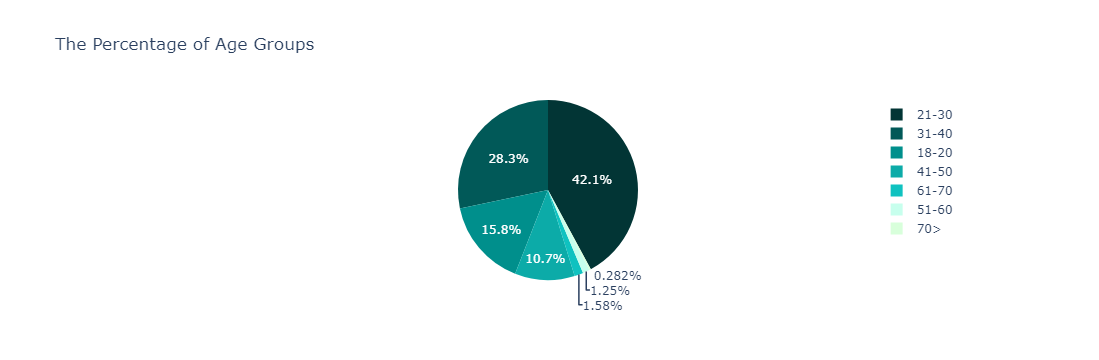

In [188]:
fig = px.pie(agegroup, values = "num_of_cus",
             color = "age_group", names = "age_group", template = "plotly_white", 
             color_discrete_map = {'18-20': '#008F8C', '21-30': '#023535', '31-40': '#015958',
                                   '41-50': '#0CABA8', '51-60': '#C7FFED', '61-70': '#0FC2C0',
                                   '70>': '#D8FFDB'},
             title = "The Percentage of Age Groups")

fig.show()

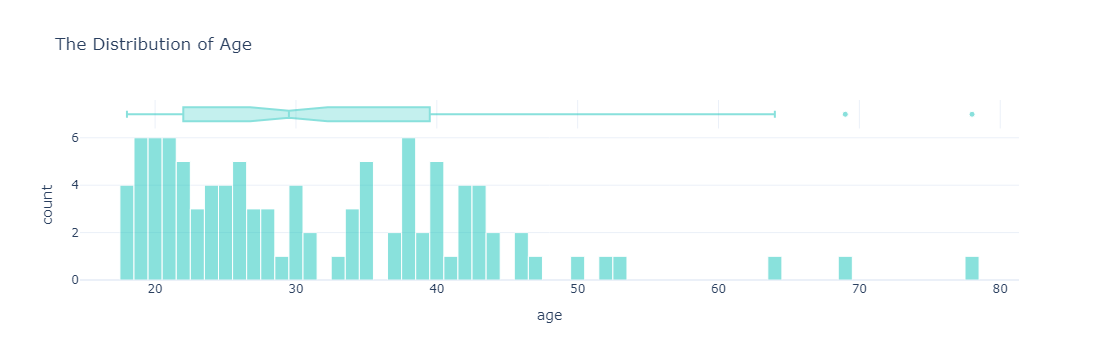

In [204]:
age_distribution = df_customer[["customer_id", "age"]].groupby("customer_id").agg("mean")["age"]
age_distribution = age_distribution.to_frame()

fig = px.histogram(age_distribution, x = "age", nbins = 100, marginal = "box", 
                   template = "plotly_white",
                   title = "The Distribution of Age")

fig.update_traces(marker_color = '#15C3BA', marker_line_color = 'white', 
                  marker_line_width = 1, opacity = 0.5)

fig.show()

# <b><span style = 'color:#15C3BA'> 5.2 ❯</span> Gender</b>

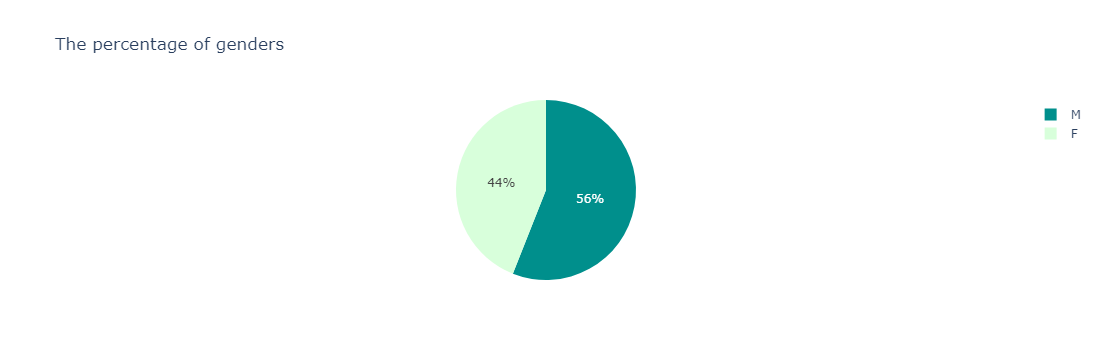

In [224]:
gender = df_customer[["customer_id", "gender"]].drop_duplicates()
gender = gender.groupby("gender").size().to_frame()
gender.columns = ["num_of_cus"]
gender.reset_index(inplace = True)

fig = px.pie(gender, values = "num_of_cus", names = "gender", 
             color = "gender", color_discrete_sequence = ['#D8FFDB', '#008F8C'],
             title = "The percentage of genders")

fig.show()

# <b><span style = 'color:#15C3BA'>5.3 ❯</span> Account</b>

In [231]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         12043 non-null  object 
 1   first_name          12043 non-null  object 
 2   gender              12043 non-null  object 
 3   age                 12043 non-null  int64  
 4   age_group           12043 non-null  object 
 5   account             12043 non-null  object 
 6   merchant_longitude  7717 non-null   float64
 7   merchant_latitude   7717 non-null   float64
 8   purchase_longitude  12043 non-null  float64
 9   purchase_latitude   12043 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 941.0+ KB


In [128]:
account = df_customer.groupby("customer_id")["account"].nunique()
account = account.to_frame()
account.describe()

,account
count,100.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


# <b><span style = 'color:#15C3BA'> 5.4 ❯</span> Location</b>

In [17]:
df_location = anz_updated[["customer_id", "merchant_state", "merchant_latitude", "merchant_longitude", "purchase_latitude", "purchase_longitude"]]
df_location["merchant_location"] = (df_location["merchant_latitude"]**2 + df_location["merchant_longitude"]**2)**0.5
df_location["purchase_location"] = (df_location["purchase_latitude"]**2 + df_location["purchase_longitude"]**2)**0.5
df_location["same"] = df_location["merchant_location"] == df_location["purchase_location"]
df_location.head()

,customer_id,merchant_state,merchant_latitude,merchant_longitude,purchase_latitude,purchase_longitude,merchant_location,purchase_location,same
0,CUS-2487424745,QLD,-27.99,153.38,-27.95,153.41,155.913003,155.935341,False
1,CUS-2487424745,NSW,-33.87,151.21,-27.95,153.41,154.956900,155.935341,False
2,CUS-2142601169,NSW,-33.87,151.21,-33.94,151.23,154.956900,154.991730,False
3,CUS-1614226872,QLD,-26.68,153.05,-27.66,153.10,155.358054,155.578551,False
4,CUS-2487424745,QLD,-28.06,153.44,-27.95,153.41,155.984606,155.935341,False


In [19]:
df_location["same"].value_counts()

same
False    12035
True         8
Name: count, dtype: int64

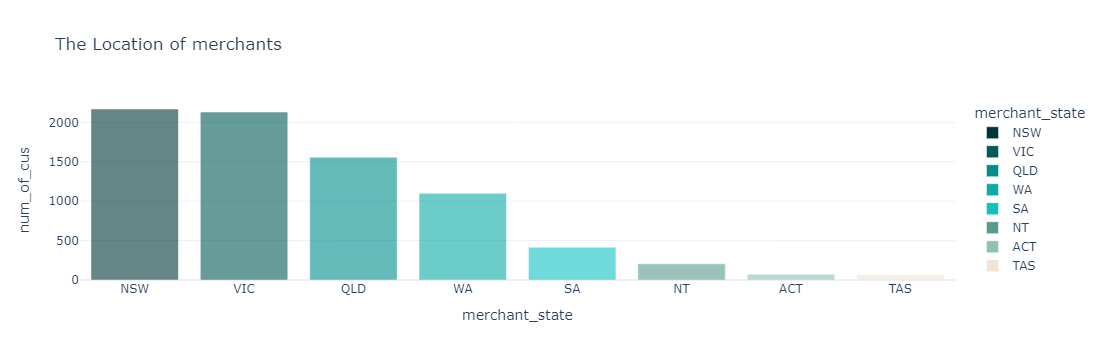

In [296]:
state = df_location.groupby("merchant_state").size().to_frame()
state.columns = ["num_of_cus"]
state.reset_index(inplace = True)
state.sort_values(by = "num_of_cus", ascending = False, inplace = True)

fig = px.bar(state, x = "merchant_state", y = "num_of_cus", 
             color = "merchant_state", color_discrete_sequence = ['#023535', '#015958', '#008F8C', '#0CABA8', 
                                                                  '#0FC2C0', '#589A8D', '#8FC1B5', '#F2E3D5'],
             template = 'plotly_white', opacity = 0.6,
             title = "The Location of merchants")

fig.show()

# <div style="padding: 20px;  color:white; margin:0; font-size: 70%; text-align:left; display:fill; border-radius: 10px; overflow: hidden; background-color:#2DA19B"> <b> Conclusion</b></div>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Age</b> 
* The large proportion of customers belonged to <b>21-40</b> age groups.
* There were <b>two</b> outliers of 69 and 78 years-old people.
<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Gender</b> 
* The figure for <b>Male</b> was slightly higher than that of <b>Female</b>, with <b> 56 and 44 people</b> respectively.
<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Account</b>
* <b>All</b> customers had only <b>one</b> account.

<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Location</b>
* Most transactions occurred in <b>NSW</b> and <b>VIC</b>
* Most customers made purchases from the <b>same</b> locations.

# <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:#15C3BA'>6 ❯</span></b> <b> Transaction Information</b></div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>Transaction data</b>

In [32]:
df_transaction = anz_updated[["customer_id", "transaction_id", "account", "status", "card_present_flag", "txn_description", 
                              "balance", "amount", "movement"]]

df_transaction.head()

,customer_id,transaction_id,account,status,card_present_flag,txn_description,balance,amount,movement
0,CUS-2487424745,a623070bfead4541a6b0fff8a09e706c,ACC-1598451071,authorized,1.0,POS,35.39,16.25,debit
1,CUS-2487424745,13270a2a902145da9db4c951e04b51b9,ACC-1598451071,authorized,0.0,SALES-POS,21.20,14.19,debit
2,CUS-2142601169,feb79e7ecd7048a5a36ec889d1a94270,ACC-1222300524,authorized,1.0,POS,5.71,6.42,debit
3,CUS-1614226872,2698170da3704fd981b15e64a006079e,ACC-1037050564,authorized,1.0,SALES-POS,2117.22,40.90,debit
4,CUS-2487424745,329adf79878c4cf0aeb4188b4691c266,ACC-1598451071,authorized,1.0,SALES-POS,17.95,3.25,debit


# <b><span style = 'color:#15C3BA'> 6.1 ❯</span> Movement</b>

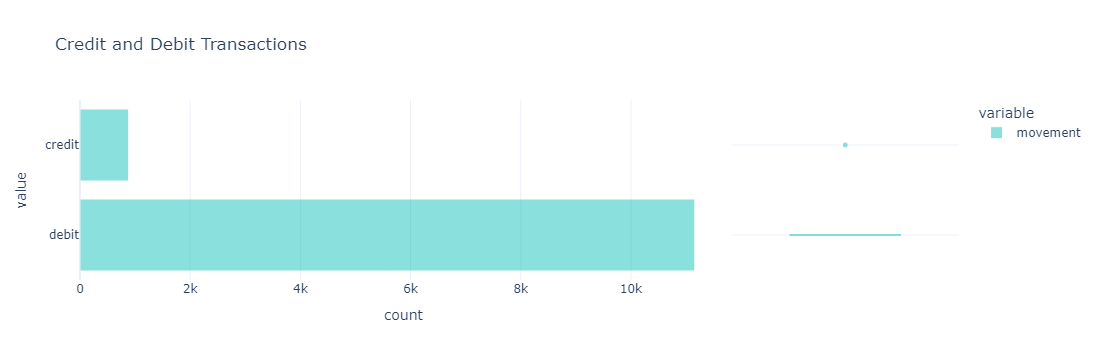

In [358]:
fig = px.histogram(df_transaction["movement"], nbins = 100, marginal = "box",
                   template = "plotly_white", orientation = "h",
                   title = "Credit and Debit Transactions")

fig.update_traces(marker_color = "#15C3BA", marker_line_color = "white", 
                  marker_line_width = 1, opacity = 0.5)

fig.show()

In [38]:
credit = df_transaction.query("movement == 'credit'")
credit = credit["txn_description"].value_counts()

print("When the transactions have the movement as credit, the txn_description is: ")
print(credit), 
print('\n', '-'*80, '\n')

debit = df_transaction.query("movement == 'debit'")
debit = debit["txn_description"].value_counts()

print("When the transactions have the movement as debit, the txn_description is: ")
print(debit), 
print('\n', '-'*80, '\n')

When the transactions have the movement as credit, the txn_description is: 
txn_description
PAY/SALARY    883
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 

When the transactions have the movement as debit, the txn_description is: 
txn_description
SALES-POS     3934
POS           3783
PAYMENT       2600
INTER BANK     742
PHONE BANK     101
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 



# <b><span style = 'color:#15C3BA'> 6.2 ❯</span> Status</b>

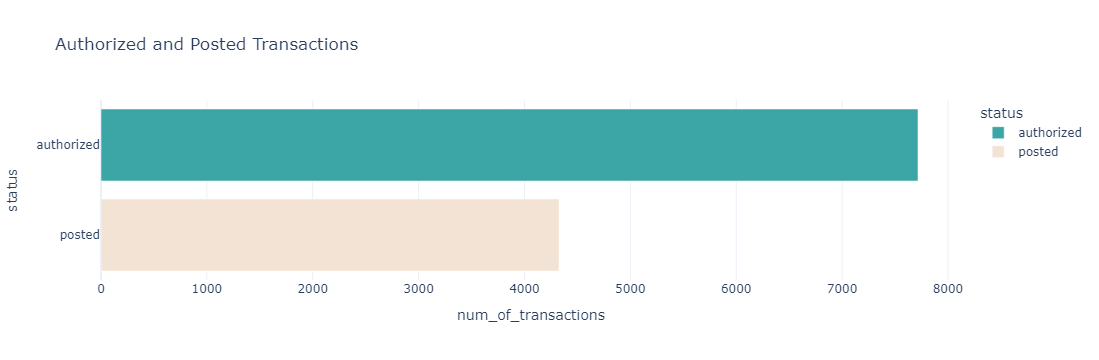

In [380]:
status = df_transaction.groupby("status").size().to_frame()
status.columns = ["num_of_transactions"]
status.reset_index(inplace = True)

fig = px.bar(status, y = "status", x = "num_of_transactions",
             color = "status", color_discrete_sequence = ["#3CA6A6", "#F2E3D5"], 
             template = "plotly_white", orientation = "h", 
             title = "Authorized and Posted Transactions")


fig.show()

# <b><span style = 'color:#15C3BA'> 6.3 ❯</span> Transaction Description</b>

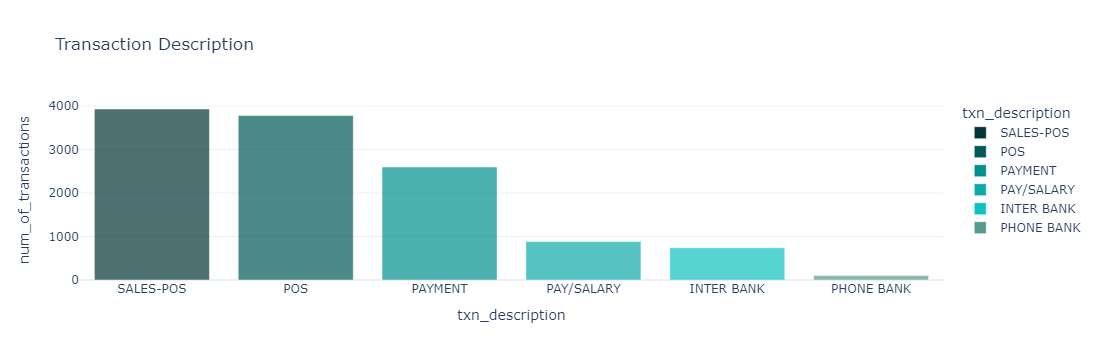

In [397]:
description = df_transaction.groupby("txn_description").size().to_frame()
description.columns = ["num_of_transactions"]
description.sort_values(by = "num_of_transactions", ascending = False, inplace = True)
description.reset_index(inplace = True)

fig = px.bar(description, x = "txn_description", y = "num_of_transactions", 
             color = "txn_description", color_discrete_sequence = ['#023535', '#015958', '#008F8C', '#0CABA8', 
                                                                  '#0FC2C0', '#589A8D'], 
             template = 'plotly_white', opacity = 0.7, 
             title = "Transaction Description")

fig.show()

# <b><span style = 'color:#15C3BA'> 6.4 ❯</span> Presence of card during payment</b>

In [7]:
card = df_transaction["card_present_flag"].value_counts(dropna = False).to_frame()
card.style.bar(align = "mid", color = ['#15C3BA','#15C3BA'])

,count
card_present_flag,
1.000000,6194
nan,4326
0.000000,1523


In [9]:
df_transaction.columns

Index(['customer_id', 'transaction_id', 'account', 'status',
       'card_present_flag', 'txn_description', 'balance', 'amount',
       'movement'],
      dtype='object')

In [21]:
card_activated = df_transaction.query("card_present_flag == 1")
cols = card_activated[["status", "txn_description", "movement"]]

for i in cols:
    print(f"When card is activated, the feature {i} is: ")
    print(card_activated[i].value_counts(dropna = False))
    print('\n', '-'*80, '\n')

When card is activated, the feature status is: 
status
authorized    6194
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 

When card is activated, the feature txn_description is: 
txn_description
SALES-POS    3169
POS          3025
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 

When card is activated, the feature movement is: 
movement
debit    6194
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 



In [40]:
card_unactivated = df_transaction.query("card_present_flag == 0")
cols = card_unactivated[["status", "txn_description", "movement"]]

for i in cols:
    print(f"When card is unactivated, the feature {i}  is: ")
    print(card_unactivated[i].value_counts(dropna = False))
    print('\n', '-'*80, '\n')

When card is unactivated, the feature status  is: 
status
authorized    1523
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 

When card is unactivated, the feature txn_description  is: 
txn_description
SALES-POS    765
POS          758
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 

When card is unactivated, the feature movement  is: 
movement
debit    1523
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 



In [27]:
card_unknown = df_transaction[df_transaction["card_present_flag"].isnull()]
cols = card_unknown[["status", "txn_description", "movement"]]

for i in cols:
    print(f"When card is null, the feature {i}  is: ")
    print(card_unknown[i].value_counts(dropna = False))
    print('\n', '-'*80, '\n')

When card is null, the feature status  is: 
status
posted    4326
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 

When card is null, the feature txn_description  is: 
txn_description
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 

When card is null, the feature movement  is: 
movement
debit     3443
credit     883
Name: count, dtype: int64

 -------------------------------------------------------------------------------- 



# <div style="padding: 20px;  color:white; margin:0; font-size: 70%; text-align:left; display:fill; border-radius: 10px; overflow: hidden; background-color:#2DA19B"> <b> Conclusion</b></div>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Movement</b> 
* <b>movement</b> can be divided into two groups, <b><span style='color:#15C3BA'>credit</span> & <span style='color:#15C3BA'>debit</span></b> transactions
* <span style='color:#15C3BA'><b>Credit</b></span> transactions were associated with <b><span style='color:#15C3BA'>salary payments</span></b>, meanwhile, <span style='color:#15C3BA'><b>Debit</b></span> transactions were presented for <b><span style='color:#15C3BA'>credit</span> & <span style='color:#15C3BA'>customers' purchases</span></b>.
<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Status</b> 
* Transaction can be divided into two groups of <b>Status</b>, <b><span style='color:#15C3BA'>authorised</span> & <span style='color:#15C3BA'>posted</span></b>
<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Presence of Card during Payments</b>
* Most transactions occurred in <b>NSW</b> and <b>VIC</b>
* Most customers made purchases from the <b>same</b> locations.s.

# <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:#15C3BA'>7 ❯</span></b> <b>Credit Transaction (Income)</b></div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>Credit Transaction Data</b>

In [62]:
df_credit = anz_updated.query("movement == 'credit'")

df_credit.head()

,status,card_present_flag,account,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,merchant_longitude,merchant_latitude,purchase_longitude,purchase_latitude,age_group,year,month,day,day_of_week,hour,minute
50,posted,NaN,ACC-588564840,PAY/SALARY,NaN,0.0,Isaiah,8342.11,2018-08-01,M,23,NaN,NaN,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,credit,NaN,NaN,151.27,-33.76,21-30,2018,8,1,Wednesday,11,0
61,posted,NaN,ACC-1650504218,PAY/SALARY,NaN,0.0,Marissa,2040.58,2018-08-01,F,23,NaN,NaN,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,credit,NaN,NaN,145.01,-37.93,21-30,2018,8,1,Wednesday,12,0
64,posted,NaN,ACC-3326339947,PAY/SALARY,NaN,0.0,Eric,3158.51,2018-08-01,M,22,NaN,NaN,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,credit,NaN,NaN,151.18,-33.80,21-30,2018,8,1,Wednesday,12,0
68,posted,NaN,ACC-3541460373,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,2018-08-01,M,24,NaN,NaN,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,credit,NaN,NaN,145.00,-37.83,21-30,2018,8,1,Wednesday,13,0
70,posted,NaN,ACC-2776252858,PAY/SALARY,NaN,0.0,Kristin,2271.79,2018-08-01,F,43,NaN,NaN,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,credit,NaN,NaN,144.95,-37.76,41-50,2018,8,1,Wednesday,13,0


In [179]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883 entries, 50 to 12004
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              883 non-null    object 
 1   account             883 non-null    object 
 2   txn_description     883 non-null    object 
 3   merchant_code       883 non-null    float64
 4   first_name          883 non-null    object 
 5   balance             883 non-null    float64
 6   date                883 non-null    object 
 7   gender              883 non-null    object 
 8   age                 883 non-null    int64  
 9   amount              883 non-null    float64
 10  transaction_id      883 non-null    object 
 11  customer_id         883 non-null    object 
 12  movement            883 non-null    object 
 13  purchase_longitude  883 non-null    float64
 14  purchase_latitude   883 non-null    float64
 15  age_group           883 non-null    object 
 16  year      

In [130]:
df_credit["amount"].describe()

count     883.000000
mean     1898.728029
std      1150.364621
min       576.000000
25%      1013.670000
50%      1626.480000
75%      2538.680000
max      8835.980000
Name: amount, dtype: float64

# <b><span style = 'color:#15C3BA'> 7.1 ❯</span> Monthly Salary</b>

In [64]:
monthly_salary = df_credit.groupby("customer_id")["amount"].sum()/3
monthly_salary = monthly_salary.to_frame()

monthly_salary.describe()

,amount
count,100.000000
mean,5588.589500
std,2247.181239
min,2385.320000
25%,3863.777500
50%,4937.828333
75%,7110.838333
max,11781.306667


In [98]:
print("The number of customers earning less than the average was ", len(monthly_salary[monthly_salary["amount"] < 5588]), "customers")

The number of customers earning less than the average was  61 customers


#### <div style = "background-color:#2DA19B; padding: 8px 0px; border-radius: 8px; color: white">  <b><i>Conclusion:</i></b></div>

The credit dataframe contains data related to salary payments.

<b><span style='color:#15C3BA'>❯❯❯❯</span></b> <b>Monthly Salary</b></div>
* The middle average of monthly salary was <b>55888 AUD</b>.
* The smallest average of monthly salary was 2385 AUD.
* The highest average of monthly salary was 117981 AUD.
* There are 61 customers earn less than the <b><span style='color:#15C3BA'> average income (5588 AUD)</span></b>

<b><span style='color:#15C3BA'>❯❯❯❯</span></b> <b> Customer Segmentation by Income</b></div>


# <b><span style = 'color:#15C3BA'> 7.2 ❯</span> Customer Segments by Income Average</b>

In [66]:
monthly_salary.sort_values(by = "amount", ascending = False, inplace = True)
monthly_salary

,amount
customer_id,
CUS-1816693151,11781.306667
CUS-3142625864,11214.710000
CUS-2738291516,11027.293333
CUS-2155701614,10587.373333
CUS-261674136,10279.033333
...,...
CUS-72755508,2901.280000
CUS-3255104878,2879.196667
CUS-880898248,2867.960000


In [68]:
df = monthly_salary[["amount"]]

highest_earners = df[:30]
middle_earners = df[30:70]
lowest_earners = df[-30:]

highest_earners["group"] = "high"
middle_earners["group"] = "middle"
lowest_earners["group"] = "low"

income_group = pd.concat([highest_earners, middle_earners, lowest_earners], axis = 0)

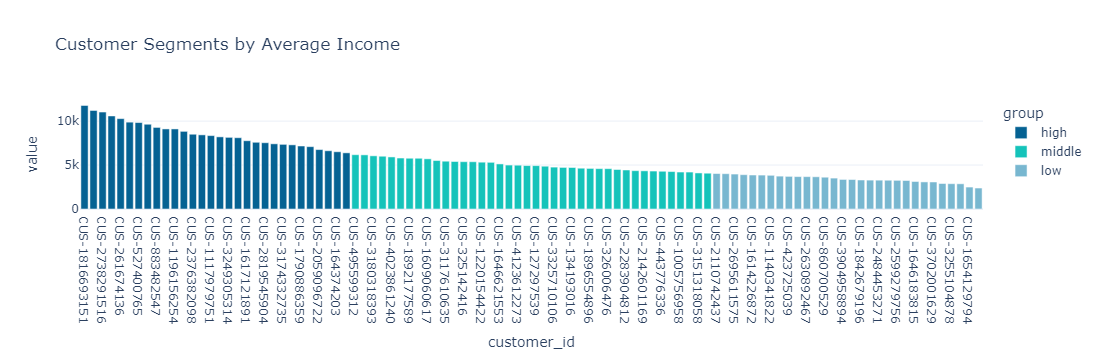

In [70]:
fig = px.bar(income_group, 
             color = 'group', color_discrete_sequence = ['#056293', '#15C3BA', '#78B7D0'], 
             template = 'plotly_white', height = 400, 
             title = "Customer Segments by Average Income") 

fig.show()   

# <b><span style = 'color:#15C3BA'> 7.3 ❯</span> Salary Payment Abnormalities</b>

In [72]:
salary_payment = df_credit.copy()
salary_payment["date"] = salary_payment["date"].astype("datetime64[ns]")
salary_payment["period"] = salary_payment.groupby("customer_id")["date"].diff(1)
salary_payment["period_str"] = salary_payment["period"].astype('str')
salary_payment["period"] = salary_payment["period"].dropna(axis = 0)

In [433]:
salary_payment.tail()

,status,account,txn_description,merchant_code,first_name,balance,date,gender,age,amount,transaction_id,customer_id,movement,purchase_longitude,purchase_latitude,age_group,year,month,day,day_of_week,hour,minute,period,period_str
11995,posted,ACC-1973887809,PAY/SALARY,0.0,Antonio,9378.51,2018-10-31,M,26,1098.91,0e6cffb4401043c891ab7a50ec594208,CUS-1646621553,credit,115.78,-31.90,21-30,2018,10,31,Wednesday,16,0,7 days,7 days
12000,posted,ACC-819621312,PAY/SALARY,0.0,Michele,3440.01,2018-10-31,F,30,1158.15,ad13e06fffba4771b3c994f9147e68c0,CUS-1271030853,credit,145.04,-37.85,21-30,2018,10,31,Wednesday,17,0,7 days,7 days
12001,posted,ACC-2920611728,PAY/SALARY,0.0,Tyler,11381.44,2018-10-31,M,69,1043.12,14a1604e6ead4b54b65d7a28ec546a69,CUS-1388323263,credit,144.96,-37.76,61-70,2018,10,31,Wednesday,17,0,7 days,7 days
12003,posted,ACC-1799207998,PAY/SALARY,0.0,Susan,11454.52,2018-10-31,F,20,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,CUS-164374203,credit,150.68,-33.79,18-20,2018,10,31,Wednesday,17,0,7 days,7 days
12004,posted,ACC-2171593283,PAY/SALARY,0.0,Fernando,19893.45,2018-10-31,M,19,2639.76,d4804402c1c34e0ebc53a4c395e0c63d,CUS-2317998716,credit,146.94,-36.04,18-20,2018,10,31,Wednesday,17,0,14 days,14 days


In [74]:
salary_payment["period"].value_counts()

period
7 days     478
14 days    279
0 days       7
28 days      5
31 days      5
30 days      5
29 days      2
32 days      1
61 days      1
Name: count, dtype: int64

In [76]:
def find_account(id):
    return salary_payment.groupby("account").get_group(id)

## <b><span style = 'color:#15C3BA'> ❯❯</span> Abnormal Payment</b>

In [78]:
abnormal_salary = salary_payment[~salary_payment["period_str"].isin(['7 days', '14 days', 'NaT'])]
abnormal_account = dict(tuple(abnormal_salary.groupby("account")))
abnormal_list = list(abnormal_account.keys())
                
print("The number of accounts that had abnormal payments of salary", len(abnormal_list), "accounts")
print('\n', '-'*80, '\n')
print("Below is the list of abnormal accounts: ")
print('')
abnormal_list

The number of accounts that had abnormal payments of salary 14 accounts

 -------------------------------------------------------------------------------- 

Below is the list of abnormal accounts: 



['ACC-1056639002',
 'ACC-1217063613',
 'ACC-1523339231',
 'ACC-1683215619',
 'ACC-1903037542',
 'ACC-2107684084',
 'ACC-211792489',
 'ACC-2153562714',
 'ACC-2270192619',
 'ACC-2673069055',
 'ACC-2970114956',
 'ACC-3100725361',
 'ACC-354106658',
 'ACC-414431115']

In [80]:
abnormal_salary = salary_payment[salary_payment["account"].isin(abnormal_list)].groupby("account").nth(-1)
abnormal_salary.index = abnormal_salary['account']
del abnormal_salary['account']

abnormal_salary.head()

,status,card_present_flag,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,merchant_longitude,merchant_latitude,purchase_longitude,purchase_latitude,age_group,year,month,day,day_of_week,hour,minute,period,period_str
account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-2673069055,posted,NaN,PAY/SALARY,NaN,0.0,Richard,21158.28,2018-09-07,M,24,NaN,NaN,6024.49,2a20583ac7ce4bffa46624de2f94d5af,CUS-51506836,credit,NaN,NaN,152.99,-27.49,21-30,2018,9,7,Friday,15,0,31 days,31 days
ACC-2270192619,posted,NaN,PAY/SALARY,NaN,0.0,Darren,17475.73,2018-10-05,M,20,NaN,NaN,3026.95,efbc0cb742af4879a122c99ae728354b,CUS-2110742437,credit,NaN,NaN,138.56,-35.27,18-20,2018,10,5,Friday,17,0,0 days,0 days
ACC-354106658,posted,NaN,PAY/SALARY,NaN,0.0,Christine,24135.54,2018-10-15,F,39,NaN,NaN,5103.51,e4e7f0dd7c504c45990277dad7a8a86c,CUS-2376382098,credit,NaN,NaN,151.04,-33.80,31-40,2018,10,15,Monday,15,0,0 days,0 days
ACC-1683215619,posted,NaN,PAY/SALARY,NaN,0.0,Barry,11844.75,2018-10-18,M,38,NaN,NaN,2500.00,85ac3df9a1554c84b7956086e1e86cf3,CUS-1604596597,credit,NaN,NaN,138.67,-34.86,31-40,2018,10,18,Thursday,15,0,0 days,0 days
ACC-1523339231,posted,NaN,PAY/SALARY,NaN,0.0,Tim,85890.29,2018-10-19,M,40,NaN,NaN,8835.98,d996300131a641c8bf25f86e1aef9bc6,CUS-1816693151,credit,NaN,NaN,115.83,-31.90,31-40,2018,10,19,Friday,13,0,0 days,0 days


In [82]:
abnormal_salary.loc['ACC-1683215619', 'annual_salary'] = (2500*2/30)*365
abnormal_salary.loc['ACC-1056639002', 'annual_salary'] = (3195.01/14)*365 - 3195.01/2
abnormal_salary.loc['ACC-1217063613', 'annual_salary'] = (4863.62/30)*365
abnormal_salary.loc['ACC-1523339231', 'annual_salary'] = (8835.98/30)*365 + 8835.98
abnormal_salary.loc['ACC-1903037542', 'annual_salary'] = (1808.62/14)*365 - 1808.62/2
abnormal_salary.loc['ACC-211792489', 'annual_salary'] = (4910.9/60)*365
abnormal_salary.loc['ACC-2153562714', 'annual_salary'] = (3712.56/30)*365
abnormal_salary.loc['ACC-2673069055', 'annual_salary'] = (6024.49/30)*365
abnormal_salary.loc['ACC-2970114956', 'annual_salary'] = (1433.98/14)*365 - 1433.98/2
abnormal_salary.loc['ACC-354106658', 'annual_salary'] = (5103.51*2/30)*365 - 5103.51
abnormal_salary.loc['ACC-414431115', 'annual_salary'] = (1603.36/14)*365 - 1603.63/2
abnormal_salary.loc['ACC-2270192619', 'annual_salary'] = (3062.95/30)*365 + 3062.95
abnormal_salary.loc['ACC-2107684084', 'annual_salary'] = (2218.73/14)*365 - 2218.73/2
abnormal_salary.loc['ACC-3100725361', 'annual_salary'] = (6107.23/14)*365 + 6107.23

In [84]:
abnormal_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, ACC-2673069055 to ACC-3100725361
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   status              14 non-null     object         
 1   card_present_flag   0 non-null      float64        
 2   txn_description     14 non-null     object         
 3   merchant_id         0 non-null      object         
 4   merchant_code       14 non-null     float64        
 5   first_name          14 non-null     object         
 6   balance             14 non-null     float64        
 7   date                14 non-null     datetime64[ns] 
 8   gender              14 non-null     object         
 9   age                 14 non-null     int64          
 10  merchant_suburb     0 non-null      object         
 11  merchant_state      0 non-null      object         
 12  amount              14 non-null     float64        
 13  transaction_id   

## <b><span style = 'color:#15C3BA'> ❯❯</span> Normal Payment</b>

In [86]:
normal_salary = salary_payment[~salary_payment["account"].isin(abnormal_list)].groupby('account').nth(-1)
normal_salary.index = normal_salary["account"]
del normal_salary["account"]

normal_salary

,status,card_present_flag,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,merchant_longitude,merchant_latitude,purchase_longitude,purchase_latitude,age_group,year,month,day,day_of_week,hour,minute,period,period_str
account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-3536132544,posted,NaN,PAY/SALARY,NaN,0.0,Heather,8727.47,2018-10-18,F,41,NaN,NaN,2101.51,5bd791f6625b48858b36e632adc4a22e,CUS-2348881191,credit,NaN,NaN,144.93,-37.79,41-50,2018,10,18,Thursday,11,0,14 days,14 days
ACC-2259139624,posted,NaN,PAY/SALARY,NaN,0.0,Cindy,20858.72,2018-10-18,F,19,NaN,NaN,3676.94,36352d4a7a3644d1b5168d9d37c632f7,CUS-3174332735,credit,NaN,NaN,144.66,-37.91,18-20,2018,10,18,Thursday,11,0,14 days,14 days
ACC-1279356312,posted,NaN,PAY/SALARY,NaN,0.0,Tyler,12625.91,2018-10-18,M,44,NaN,NaN,2887.34,a09159eb3acd4663baca1fe789df31f3,CUS-1892177589,credit,NaN,NaN,144.79,-37.73,41-50,2018,10,18,Thursday,12,0,14 days,14 days
ACC-1243371644,posted,NaN,PAY/SALARY,NaN,0.0,Gregory,6599.68,2018-10-18,M,42,NaN,NaN,1681.58,76d2ee9752334f47a12c1ec298921b5b,CUS-3904958894,credit,NaN,NaN,150.90,-33.78,41-50,2018,10,18,Thursday,13,0,14 days,14 days
ACC-1608363396,posted,NaN,PAY/SALARY,NaN,0.0,Robert,9739.88,2018-10-18,M,20,NaN,NaN,2320.30,49bf55fb7e3a4f0aafad245ecc0f34c6,CUS-2688605418,credit,NaN,NaN,151.22,-33.87,18-20,2018,10,18,Thursday,14,0,14 days,14 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACC-1973887809,posted,NaN,PAY/SALARY,NaN,0.0,Antonio,9378.51,2018-10-31,M,26,NaN,NaN,1098.91,0e6cffb4401043c891ab7a50ec594208,CUS-1646621553,credit,NaN,NaN,115.78,-31.90,21-30,2018,10,31,Wednesday,16,0,7 days,7 days
ACC-819621312,posted,NaN,PAY/SALARY,NaN,0.0,Michele,3440.01,2018-10-31,F,30,NaN,NaN,1158.15,ad13e06fffba4771b3c994f9147e68c0,CUS-1271030853,credit,NaN,NaN,145.04,-37.85,21-30,2018,10,31,Wednesday,17,0,7 days,7 days
ACC-2920611728,posted,NaN,PAY/SALARY,NaN,0.0,Tyler,11381.44,2018-10-31,M,69,NaN,NaN,1043.12,14a1604e6ead4b54b65d7a28ec546a69,CUS-1388323263,credit,NaN,NaN,144.96,-37.76,61-70,2018,10,31,Wednesday,17,0,7 days,7 days


In [88]:
normal_salary["annual_salary"] = round(normal_salary["amount"]/ normal_salary["period"].dt.days * 365, 3)

In [90]:
normal_account = dict(tuple(normal_salary.groupby('account')))
normal_list = list(normal_account.keys())

print("The number of accounts that had normal payments of salary", len(normal_list), "accounts")
print('\n', '-'*80, '\n')
print("Below is the list of normal accounts: ")
print('')
normal_list

The number of accounts that had normal payments of salary 86 accounts

 -------------------------------------------------------------------------------- 

Below is the list of normal accounts: 



['ACC-1037050564',
 'ACC-1199531521',
 'ACC-1222300524',
 'ACC-1243371644',
 'ACC-1279356312',
 'ACC-1334819143',
 'ACC-1344825761',
 'ACC-1349834573',
 'ACC-1424176027',
 'ACC-1438600314',
 'ACC-1443681913',
 'ACC-1496451953',
 'ACC-1516130869',
 'ACC-154431271',
 'ACC-1598451071',
 'ACC-1608363396',
 'ACC-1650504218',
 'ACC-1652235822',
 'ACC-1710017148',
 'ACC-1788473090',
 'ACC-1799207998',
 'ACC-182446574',
 'ACC-1890605467',
 'ACC-1973887809',
 'ACC-1990648130',
 'ACC-1998563091',
 'ACC-2014856841',
 'ACC-2171593283',
 'ACC-2173390920',
 'ACC-2231965366',
 'ACC-2249586092',
 'ACC-2259139624',
 'ACC-2265520058',
 'ACC-2305712452',
 'ACC-240804743',
 'ACC-2528867619',
 'ACC-2615038700',
 'ACC-2650850707',
 'ACC-2674800293',
 'ACC-2681137560',
 'ACC-2776252858',
 'ACC-2828321672',
 'ACC-2890243754',
 'ACC-2897221629',
 'ACC-2901672282',
 'ACC-2920611728',
 'ACC-2988263882',
 'ACC-3021093232',
 'ACC-3084464802',
 'ACC-3233697971',
 'ACC-3317636250',
 'ACC-3326339947',
 'ACC-348140184

In [92]:
normal_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, ACC-3536132544 to ACC-2171593283
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   status              86 non-null     object         
 1   card_present_flag   0 non-null      float64        
 2   txn_description     86 non-null     object         
 3   merchant_id         0 non-null      object         
 4   merchant_code       86 non-null     float64        
 5   first_name          86 non-null     object         
 6   balance             86 non-null     float64        
 7   date                86 non-null     datetime64[ns] 
 8   gender              86 non-null     object         
 9   age                 86 non-null     int64          
 10  merchant_suburb     0 non-null      object         
 11  merchant_state      0 non-null      object         
 12  amount              86 non-null     float64        
 13  transaction_id   

# <b><span style = 'color:#15C3BA'> 7.4 ❯</span> Annual Salary of All Customers</b>

In [94]:
normal_salary.head()

,status,card_present_flag,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,merchant_longitude,merchant_latitude,purchase_longitude,purchase_latitude,age_group,year,month,day,day_of_week,hour,minute,period,period_str,annual_salary
account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-3536132544,posted,NaN,PAY/SALARY,NaN,0.0,Heather,8727.47,2018-10-18,F,41,NaN,NaN,2101.51,5bd791f6625b48858b36e632adc4a22e,CUS-2348881191,credit,NaN,NaN,144.93,-37.79,41-50,2018,10,18,Thursday,11,0,14 days,14 days,54789.368
ACC-2259139624,posted,NaN,PAY/SALARY,NaN,0.0,Cindy,20858.72,2018-10-18,F,19,NaN,NaN,3676.94,36352d4a7a3644d1b5168d9d37c632f7,CUS-3174332735,credit,NaN,NaN,144.66,-37.91,18-20,2018,10,18,Thursday,11,0,14 days,14 days,95863.079
ACC-1279356312,posted,NaN,PAY/SALARY,NaN,0.0,Tyler,12625.91,2018-10-18,M,44,NaN,NaN,2887.34,a09159eb3acd4663baca1fe789df31f3,CUS-1892177589,credit,NaN,NaN,144.79,-37.73,41-50,2018,10,18,Thursday,12,0,14 days,14 days,75277.079
ACC-1243371644,posted,NaN,PAY/SALARY,NaN,0.0,Gregory,6599.68,2018-10-18,M,42,NaN,NaN,1681.58,76d2ee9752334f47a12c1ec298921b5b,CUS-3904958894,credit,NaN,NaN,150.90,-33.78,41-50,2018,10,18,Thursday,13,0,14 days,14 days,43841.193
ACC-1608363396,posted,NaN,PAY/SALARY,NaN,0.0,Robert,9739.88,2018-10-18,M,20,NaN,NaN,2320.30,49bf55fb7e3a4f0aafad245ecc0f34c6,CUS-2688605418,credit,NaN,NaN,151.22,-33.87,18-20,2018,10,18,Thursday,14,0,14 days,14 days,60493.536


In [96]:
abnormal_salary.head()

,status,card_present_flag,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,merchant_longitude,merchant_latitude,purchase_longitude,purchase_latitude,age_group,year,month,day,day_of_week,hour,minute,period,period_str,annual_salary
account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-2673069055,posted,NaN,PAY/SALARY,NaN,0.0,Richard,21158.28,2018-09-07,M,24,NaN,NaN,6024.49,2a20583ac7ce4bffa46624de2f94d5af,CUS-51506836,credit,NaN,NaN,152.99,-27.49,21-30,2018,9,7,Friday,15,0,31 days,31 days,73297.961667
ACC-2270192619,posted,NaN,PAY/SALARY,NaN,0.0,Darren,17475.73,2018-10-05,M,20,NaN,NaN,3026.95,efbc0cb742af4879a122c99ae728354b,CUS-2110742437,credit,NaN,NaN,138.56,-35.27,18-20,2018,10,5,Friday,17,0,0 days,0 days,40328.841667
ACC-354106658,posted,NaN,PAY/SALARY,NaN,0.0,Christine,24135.54,2018-10-15,F,39,NaN,NaN,5103.51,e4e7f0dd7c504c45990277dad7a8a86c,CUS-2376382098,credit,NaN,NaN,151.04,-33.80,31-40,2018,10,15,Monday,15,0,0 days,0 days,119081.900000
ACC-1683215619,posted,NaN,PAY/SALARY,NaN,0.0,Barry,11844.75,2018-10-18,M,38,NaN,NaN,2500.00,85ac3df9a1554c84b7956086e1e86cf3,CUS-1604596597,credit,NaN,NaN,138.67,-34.86,31-40,2018,10,18,Thursday,15,0,0 days,0 days,60833.333333
ACC-1523339231,posted,NaN,PAY/SALARY,NaN,0.0,Tim,85890.29,2018-10-19,M,40,NaN,NaN,8835.98,d996300131a641c8bf25f86e1aef9bc6,CUS-1816693151,credit,NaN,NaN,115.83,-31.90,31-40,2018,10,19,Friday,13,0,0 days,0 days,116340.403333


In [131]:
anz_salary = pd.concat([normal_salary, abnormal_salary], axis = 0)

anz_salary.info()

NameError: name 'normal_salary' is not defined

In [100]:
anz_salary

,status,card_present_flag,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,merchant_longitude,merchant_latitude,purchase_longitude,purchase_latitude,age_group,year,month,day,day_of_week,hour,minute,period,period_str,annual_salary
account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-3536132544,posted,NaN,PAY/SALARY,NaN,0.0,Heather,8727.47,2018-10-18,F,41,NaN,NaN,2101.51,5bd791f6625b48858b36e632adc4a22e,CUS-2348881191,credit,NaN,NaN,144.93,-37.79,41-50,2018,10,18,Thursday,11,0,14 days,14 days,54789.368000
ACC-2259139624,posted,NaN,PAY/SALARY,NaN,0.0,Cindy,20858.72,2018-10-18,F,19,NaN,NaN,3676.94,36352d4a7a3644d1b5168d9d37c632f7,CUS-3174332735,credit,NaN,NaN,144.66,-37.91,18-20,2018,10,18,Thursday,11,0,14 days,14 days,95863.079000
ACC-1279356312,posted,NaN,PAY/SALARY,NaN,0.0,Tyler,12625.91,2018-10-18,M,44,NaN,NaN,2887.34,a09159eb3acd4663baca1fe789df31f3,CUS-1892177589,credit,NaN,NaN,144.79,-37.73,41-50,2018,10,18,Thursday,12,0,14 days,14 days,75277.079000
ACC-1243371644,posted,NaN,PAY/SALARY,NaN,0.0,Gregory,6599.68,2018-10-18,M,42,NaN,NaN,1681.58,76d2ee9752334f47a12c1ec298921b5b,CUS-3904958894,credit,NaN,NaN,150.90,-33.78,41-50,2018,10,18,Thursday,13,0,14 days,14 days,43841.193000
ACC-1608363396,posted,NaN,PAY/SALARY,NaN,0.0,Robert,9739.88,2018-10-18,M,20,NaN,NaN,2320.30,49bf55fb7e3a4f0aafad245ecc0f34c6,CUS-2688605418,credit,NaN,NaN,151.22,-33.87,18-20,2018,10,18,Thursday,14,0,14 days,14 days,60493.536000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACC-2970114956,posted,NaN,PAY/SALARY,NaN,0.0,Robert,12426.87,2018-10-25,M,26,NaN,NaN,1433.98,424299897e94489abae3b3a1eb29cb62,CUS-880898248,credit,NaN,NaN,144.89,-37.69,21-30,2018,10,25,Thursday,15,0,14 days,14 days,36668.917143
ACC-414431115,posted,NaN,PAY/SALARY,NaN,0.0,Amy,6988.64,2018-10-25,F,43,NaN,NaN,1630.36,a1f2848d6308429c946021b9b6326a2e,CUS-2599279756,credit,NaN,NaN,142.77,-37.06,41-50,2018,10,25,Thursday,16,0,14 days,14 days,41000.070714
ACC-1056639002,posted,NaN,PAY/SALARY,NaN,0.0,Michael,56525.54,2018-10-25,M,22,NaN,NaN,3195.01,e32f1cd8333547079e088a95fa166aa8,CUS-3462882033,credit,NaN,NaN,145.03,-37.91,21-30,2018,10,25,Thursday,17,0,14 days,14 days,81700.970000


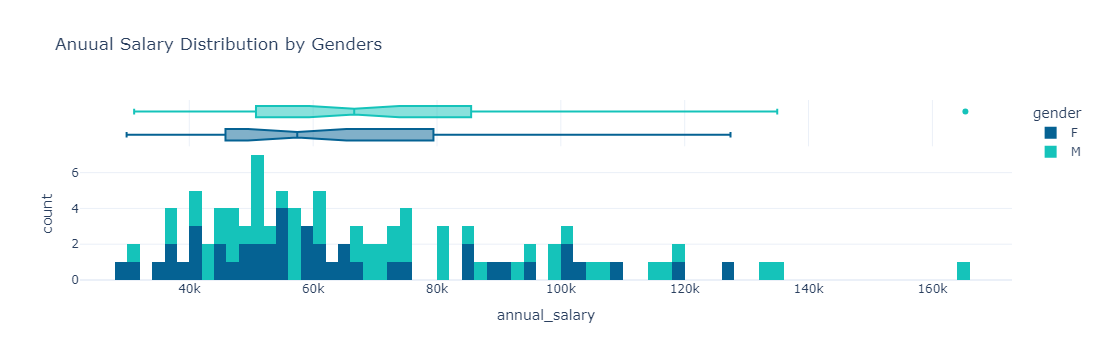

In [102]:
fig = px.histogram(anz_salary, x = "annual_salary", nbins = 100, 
                   marginal = "box", template = "plotly_white", 
                   color = "gender", color_discrete_sequence = ['#056293','#15C3BA'], 
                   title = "Anuual Salary Distribution by Genders")

fig.show()         

# <div style="padding: 20px;  color:white; margin:0; font-size: 70%; text-align:left; display:fill; border-radius: 10px; overflow: hidden; background-color:#2DA19B"> <b> Conclusion</b></div>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Quarterly Payment</b> \
There were <b>3 months</b> of salary payments of <b>100 customers</b>.
* The average monthly salary was <b>5588 AUD</b>
* The smallest average monthly salary was <b>2385 AUD</b>
* The highest average monthly salary was <b>117981 AUD</b>
<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Income Levels</b> 
* <b>61 customers</b> earn less than the <b><span style='color:#15C3BA'>average income</span></b> salary amount of <b>5588 AUD</b>
* All <b>100 customers</b> can be divided into 3 groups, including <b><span style='color:#15C3BA'>Highest Earners, Middle Earners, and Lowest Earners</span></b>
<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span>Salary Payment Abnormalities</b>
* Usually, many salary payments occurred <b>2 times a month</b>.
* There were <b>14</b> accounts reported to have abnormal salary payments.
* <hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span>Annual Salary</b>
* <b>Male customers</b> usually had higher income than <b>Female</b> did.
* Most customers had income range from <b>45K to 80K</b>.ns.

# <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:#15C3BA'>8 ❯</span></b> <b> Debit Transaction (Purchase)</b></div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>Debit Transaction Data</b>

In [67]:
df_debit = anz_updated.query("movement == 'debit'")
df_debit.head()

,status,card_present_flag,account,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,merchant_longitude,merchant_latitude,purchase_longitude,purchase_latitude,age_group,year,month,day,day_of_week,hour,minute
0,authorized,1.0,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,debit,153.38,-27.99,153.41,-27.95,21-30,2018,8,1,Wednesday,1,1
1,authorized,0.0,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,debit,151.21,-33.87,153.41,-27.95,21-30,2018,8,1,Wednesday,1,13
2,authorized,1.0,ACC-1222300524,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,debit,151.21,-33.87,151.23,-33.94,31-40,2018,8,1,Wednesday,1,26
3,authorized,1.0,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,debit,153.05,-26.68,153.10,-27.66,31-40,2018,8,1,Wednesday,1,38
4,authorized,1.0,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,debit,153.44,-28.06,153.41,-27.95,21-30,2018,8,1,Wednesday,1,51


# <b><span style = 'color:#15C3BA'> 8.1 ❯</span> Purchase Amount by Ages</b>

## <b><span style = 'color:#15C3BA'>❯❯</span> Purchases by Ages through Months</b>

In [12]:
age_month = df_debit.groupby(["month", "age_group"]).sum()["amount"].reset_index()
age_month

,month,age_group,amount
0,8,18-20,24416.81
1,8,21-30,66945.04
2,8,31-40,44335.45
3,8,41-50,28666.16
4,8,51-60,3454.09
5,8,61-70,1745.43
6,8,70>,558.21
7,9,18-20,30810.46
8,9,21-30,76815.67
9,9,31-40,70710.27


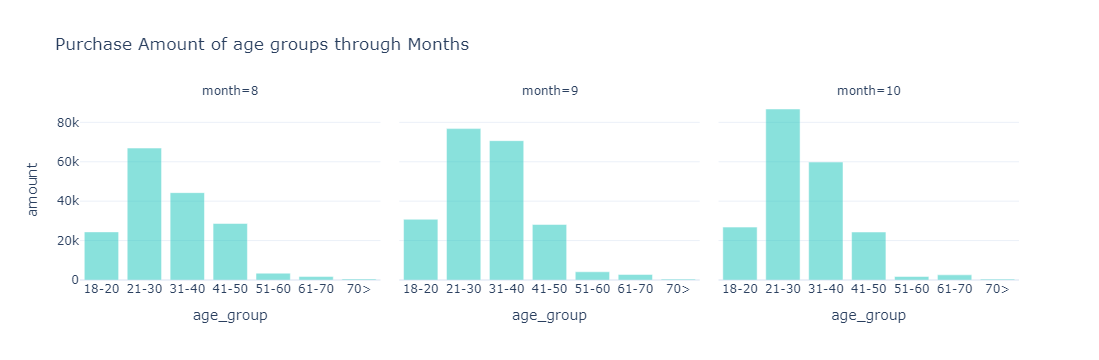

In [14]:
fig = px.bar(age_month, x = "age_group", y = "amount",
             facet_col = "month", facet_col_wrap = 3, 
             title = "Purchase Amount by Age Groups through Months",
             template = "plotly_white", opacity = 0.5)

fig.update_traces(marker_color = "#15C3BA")

fig.show()

## <b><span style = 'color:#15C3BA'> ❯❯</span> Purchases by Ages through Days of Week</b>

In [128]:
age_dow = df_debit.groupby(["day_of_week", "age_group"]).sum()["amount"].reset_index()
age_dow

,day_of_week,age_group,amount
0,Friday,18-20,11005.30
1,Friday,21-30,35092.54
2,Friday,31-40,30458.69
3,Friday,41-50,10164.38
4,Friday,51-60,847.14
5,Friday,61-70,994.47
6,Friday,70>,677.14
7,Monday,18-20,8983.90
8,Monday,21-30,27667.49
9,Monday,31-40,18894.48


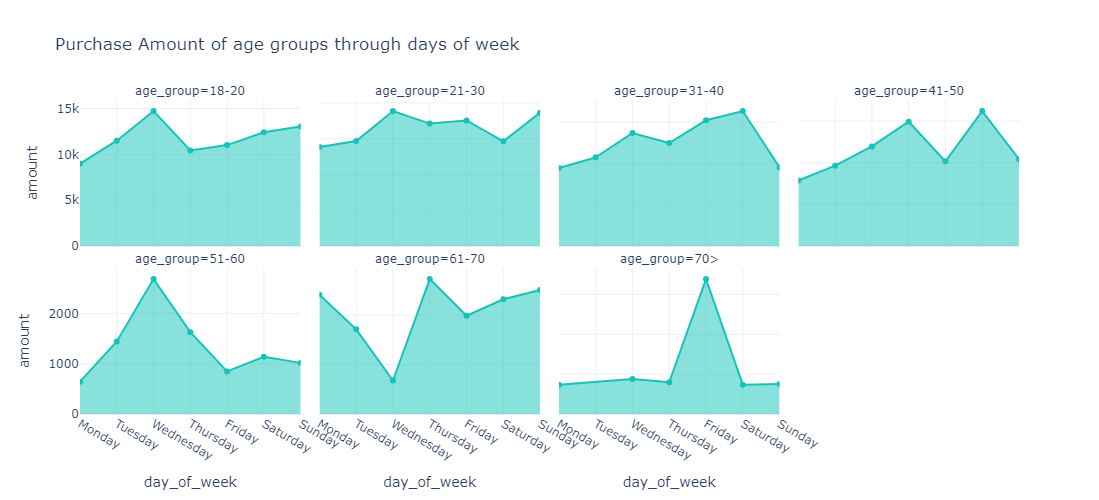

In [160]:
fig = px.area(age_dow, x = "day_of_week", y = "amount",
              color_discrete_sequence = ["#15C3BA"], 
              template = "plotly_white", markers = True, height = 500, width = 1000,
              facet_col = "age_group", facet_col_wrap = 4, 
              category_orders = {'day_of_week': ['Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday', 'Sunday'], 
                                 'age_group': ['18-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70>']}, 
              title = "Purchase Amount of age groups through days of week")

fig.update_traces(marker_color = "#15C3BA", marker_line_color = "#15C3BA")
fig.update_yaxes(matches = None)

fig.show()

## <b><span style = 'color:#15C3BA'> ❯❯</span> Hourly Purchases by Ages</b>

In [16]:
age_hour = df_debit.groupby(["hour", "age_group"]).sum()["amount"].reset_index()
age_hour

,hour,age_group,amount
0,0,18-20,386.02
1,0,21-30,1509.58
2,0,31-40,934.35
3,0,41-50,201.97
4,0,51-60,21.77
...,...,...,...
144,23,21-30,6655.25
145,23,31-40,10132.82
146,23,41-50,2054.39
147,23,51-60,50.66


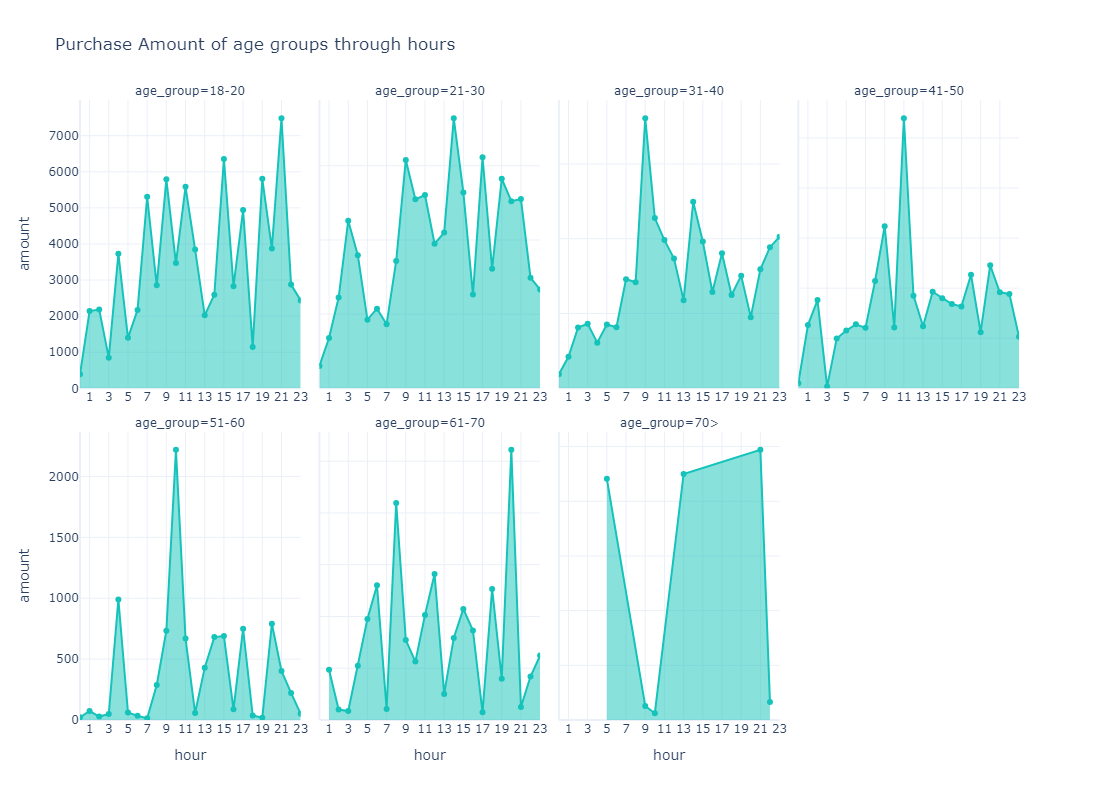

In [116]:
fig = px.area(age_hour, x = "hour", y = "amount",
              facet_col = "age_group", facet_col_wrap = 4, 
              template = "plotly_white", markers = True, height = 800, width = 1100,
              color_discrete_sequence = ["#15C3BA"], 
              title = "Purchase Amount of age groups through hours")

fig.update_yaxes(matches = None)
fig.update_xaxes(tickvals = [i for i in range(0, 24, 3)])
fig.update_layout(xaxis1_showticklabels = True, xaxis1_tickvals = np.arange(1, 24, 2), 
                  xaxis2_showticklabels = True, xaxis2_tickvals = np.arange(1, 24, 2), 
                  xaxis3_showticklabels = True, xaxis3_tickvals = np.arange(1, 24, 2), 
                  xaxis4_showticklabels = True, xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels = True, xaxis5_tickvals = np.arange(1, 24, 2), 
                  xaxis6_showticklabels = True, xaxis6_tickvals = np.arange(1, 24, 2), 
                  xaxis7_showticklabels = True, xaxis7_tickvals = np.arange(1, 24, 2), 
                  xaxis8_showticklabels = True, xaxis8_tickvals = np.arange(1, 24, 2))

fig.show()

# <div style="padding: 20px;  color:white; margin:0; font-size: 90%; text-align:left; display:fill; border-radius: 10px; overflow: hidden; background-color:#2DA19B"> <b> Conclusion</b></div>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Purchases by Ages through Months</b> 
* Overall, the purchasing trend did not change much over the three-month period.
* Customers belonging to <b>30-40 age group</b> spent more than usual in <b>September</b>.

<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Purchases by Ages through Days of Week</b> 
* <b>Under-20-years-old</b> customers tended to spend more on <b>Wednesdays</b> (14.72k), meanwhile, least on <b>Monday</b> (8.9k).
* Customers who were from <b>21 to 30 years old</b> tended to spend more on <b>Wednesdays</b> (37.71k), meanwhile, least on <b>Mondays</b> (26.66k).
* Customers who were from <b>31 to 40 years old</b> tended to spend more on <b>Saturdays</b> (32.69k), meanwhile, least on <b>Mondays</b> (18.89k).
* Customers who were from <b>41 to 50 years old</b> tended to spend more on <b>Saturdays</b> (16.2k), meanwhile, least on <b>Mondays</b> (7.8k).
* Customers who were from <b>51 to 60 years old</b> tended to spend more on <b>Wednesdays</b> (2.68k), meanwhile, least on <b>Mondays</b> (0.64k).
* Customers who were from <b>61 to 70 years old</b> tended to spend more on <b>Thursdays</b> (1.36k), meanwhile, least on <b>Mondays</b> (0.3k).
* Customers who were over <b>70 years old</b> tended to spend more on <b>Fridays</b> (0.6k), meanwhile, least on <b>Tuesdays</b> (nearly 0).

<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Hourly Purchases by Ages</b>
* The spendings of customers who were <b>under 20 years old</b> were not high compared to those of <b>21-30 years old</b>.
* The spending patterns of <b>31-40</b> and <b>41-50</b> age groups were lower than those of the <b>two younger groups</b>.
* The spendings of <b>51-60</b> and <b>61-70</b> age groups were <b>lower</b> than the <b>younger groups</b>, fluctuating throughout hours.
* The oldest group, <b>over 70 years old</b>, spent <b>the most</b>, and their spending patterns were stable during a day.

The <b>highest amount of spending</b> periods:
* <b>Under 20-years-old</b> customers spent more at <b>9 PM</b> (7.4k), meanwhile, least at <b>0 AM</b> (386)
* Customers who were from <b>21 to 30 years old</b> tended to spend more at <b>2 PM</b> (18.2k), meanwhile, least at <b>0 AM</b> (1.5k).
* Customers who were from <b>31 to 40 years old</b> tended to spend more at <b>9 PM</b> (18.05k), meanwhile, least at <b>0 AM</b> (934).
* Customers who were from <b>41 to 50 years old</b> tended to spend more at <b>11 PM</b> (10.8k), meanwhile, least at <b>3 AM</b> (67).
* Customers who were from <b>51 to 60 years old</b> tended to spend more at <b>10 PM</b> (2.2k), meanwhile, least at <b>0 AM</b> (nearly 0).
* Customers who were from <b>61 to 70 years old</b> tended to spend more at <b>8 PM</b> (1k), meanwhile, least at <b>0 AM</b> (nearly 0).
* Customers who were over <b>70 years old</b> tended to spend more at <b>9 PM</b> (494), meanwhile, least at <b>0 AM</b> (nearly 0).AM** (0)

# <b><span style = 'color:#15C3BA'> 8.2 ❯</span> Purchase Amount by Genders</b>

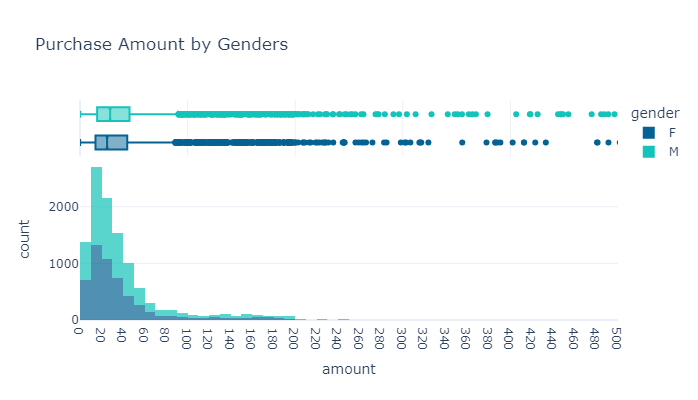

In [24]:
fig = px.histogram(df_debit, x = "amount", nbins = 1000, 
                   color = "gender", color_discrete_sequence = ['#056293','#15C3BA'], 
                   marginal = "box", template = "plotly_white", opacity = 0.7, 
                   title = "Purchase Amount by Genders", 
                   height = 400, width = 1000)
fig.update_xaxes(range = [0, 500])
fig.update_layout(xaxis = {'dtick': 20})
fig.show()

## <b><span style = 'color:#15C3BA'> ❯❯</span> Purchases by Genders through Months</b>

In [69]:
gender_hour = df_debit.groupby(["hour","month", "gender"]).agg(["count", "sum"])["amount"].reset_index()
gender_hour.columns = ["hour", "month", "gender", "number_of_transactions", "total_purchase_amount"]
gender_hour

,hour,month,gender,number_of_transactions,total_purchase_amount
0,0,8,F,27,676.43
1,0,8,M,20,568.77
2,0,9,F,19,574.91
3,0,9,M,15,442.65
4,0,10,F,11,379.63
...,...,...,...,...,...
139,23,8,M,82,4630.99
140,23,9,F,60,2621.67
141,23,9,M,87,5732.32
142,23,10,F,56,2527.53


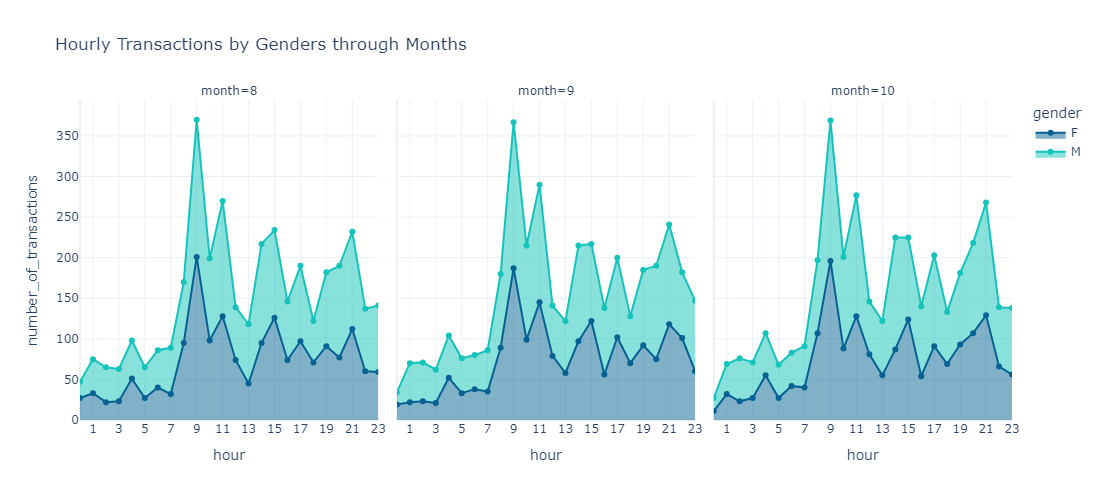

In [73]:
fig = px.area(gender_hour, x = "hour", y = "number_of_transactions", 
              color = "gender", color_discrete_sequence = ['#056293','#15C3BA'],
              facet_col = "month", facet_col_wrap = 3,
              markers = True, template = "plotly_white", 
              title = "Hourly Transactions by Genders through Months", 
              height = 500, width = 1000)

fig.update_layout(xaxis1_showticklabels = True, xaxis1_tickvals = np.arange(1, 24, 2), 
                  xaxis2_showticklabels = True, xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels = True, xaxis3_tickvals = np.arange(1, 24, 2))

fig.show()

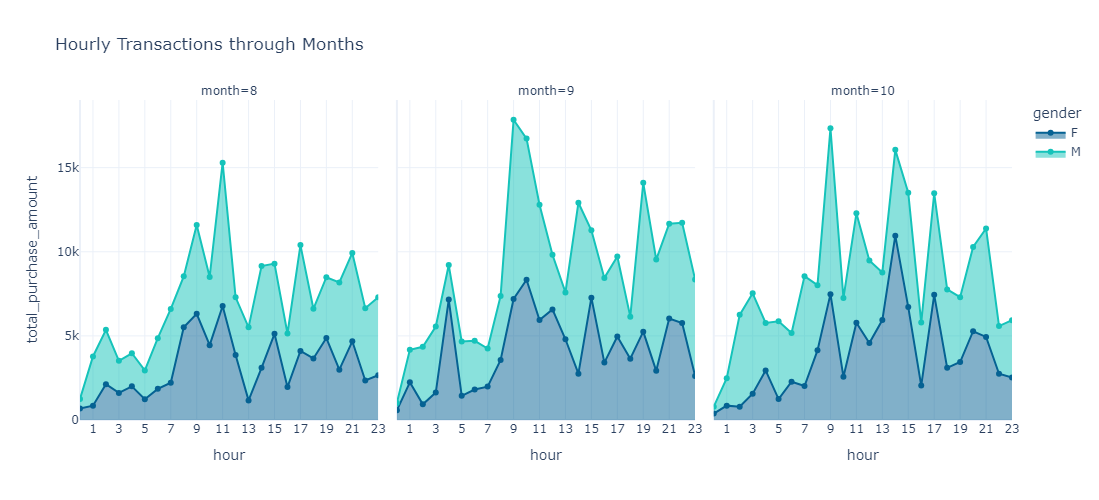

In [71]:
fig = px.area(gender_hour, x = "hour", y = "total_purchase_amount",
              color = "gender", color_discrete_sequence = ['#056293','#15C3BA'], 
              facet_col = "month", facet_col_wrap = 3,
              markers = True, template = "plotly_white", 
              title = "Hourly Transactions through Months", 
              height = 500, width = 1000)

fig.update_layout(xaxis1_showticklabels = True, xaxis1_tickvals = np.arange(1, 24, 2), 
                  xaxis2_showticklabels = True, xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels = True, xaxis3_tickvals = np.arange(1, 24, 2))
fig.show()

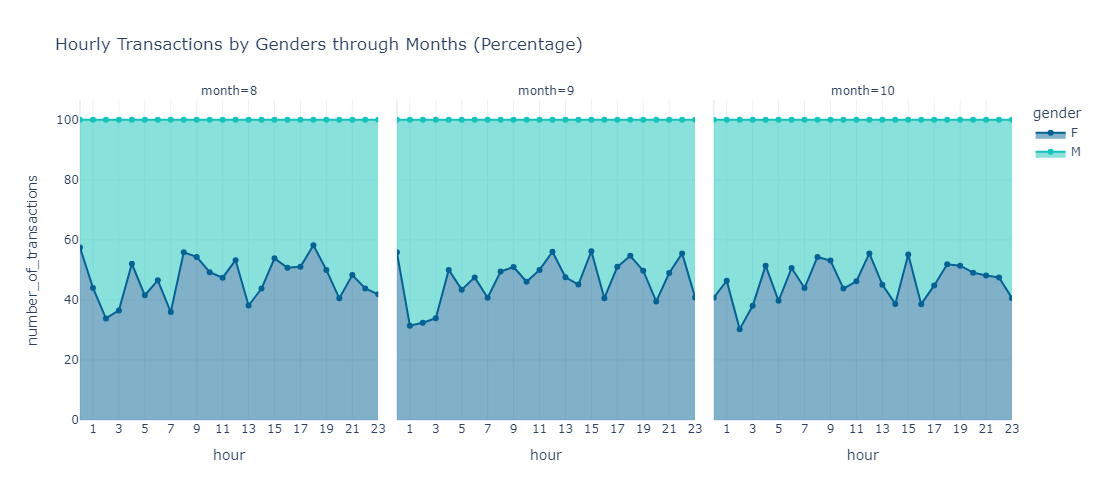

In [75]:
fig = px.area(gender_hour, x = "hour", y = "number_of_transactions", groupnorm = "percent", 
              color = "gender", color_discrete_sequence = ['#056293','#15C3BA'], 
              facet_col = "month", facet_col_wrap = 3, 
              markers = True, template = "plotly_white", 
              title = "Hourly Transactions by Genders through Months (Percentage)", 
              height = 500, width = 1000)
fig.update_layout(xaxis1_showticklabels = True, xaxis1_tickvals = np.arange(1, 24, 2), 
                  xaxis2_showticklabels = True, xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels = True, xaxis3_tickvals = np.arange(1, 24, 2))
fig.show()

## <b><span style = 'color:#15C3BA'> ❯❯</span> Purchases by Genders through Days of Week</b>

In [79]:
gender_dow = df_debit.groupby(["day_of_week", "gender"]).agg(["count", "sum"])["amount"].reset_index()
gender_dow.columns = ["day_of_week", "gender", "number_of_transactions", "total_purchase_amount"]
gender_dow

,day_of_week,gender,number_of_transactions,total_purchase_amount
0,Friday,F,939,44450.06
1,Friday,M,933,44789.60
2,Monday,F,573,31511.01
3,Monday,M,580,33901.90
4,Saturday,F,837,36124.99
5,Saturday,M,872,56877.57
6,Sunday,F,718,39932.72
7,Sunday,M,832,42241.84
8,Thursday,F,754,35366.77
9,Thursday,M,904,52310.59


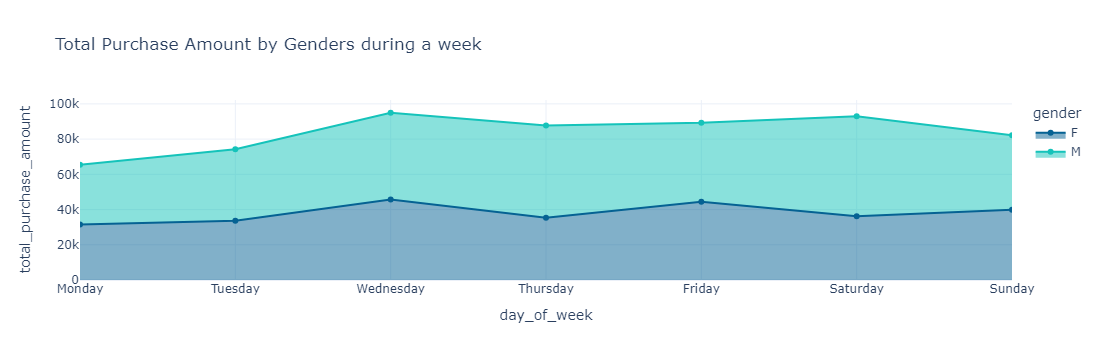

In [81]:
fig = px.area(gender_dow, x = "day_of_week", y = "total_purchase_amount", 
              color = "gender", color_discrete_sequence = ['#056293','#15C3BA'],
              markers = True, template = "plotly_white", 
              category_orders = {"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]}, 
              title = "Total Purchase Amount by Genders during a week")

fig.show()

## <b><span style = 'color:#15C3BA'> ❯❯</span> Hourly Purchases of by Genders</b>

In [85]:
gender_hour = df_debit.groupby(["hour", "day_of_week", "gender"]).agg(["count", "sum"])["amount"].reset_index()
gender_hour.columns = ["hour", "day_of_week", "gender", "number_of_transactions", "total_purchase_amount"]
gender_hour

,hour,day_of_week,gender,number_of_transactions,total_purchase_amount
0,0,Friday,F,10,268.61
1,0,Friday,M,12,265.03
2,0,Monday,F,6,149.13
3,0,Monday,M,3,61.40
4,0,Saturday,F,10,303.74
...,...,...,...,...,...
330,23,Thursday,M,41,3370.15
331,23,Tuesday,F,15,1132.87
332,23,Tuesday,M,23,1258.70
333,23,Wednesday,F,19,685.94


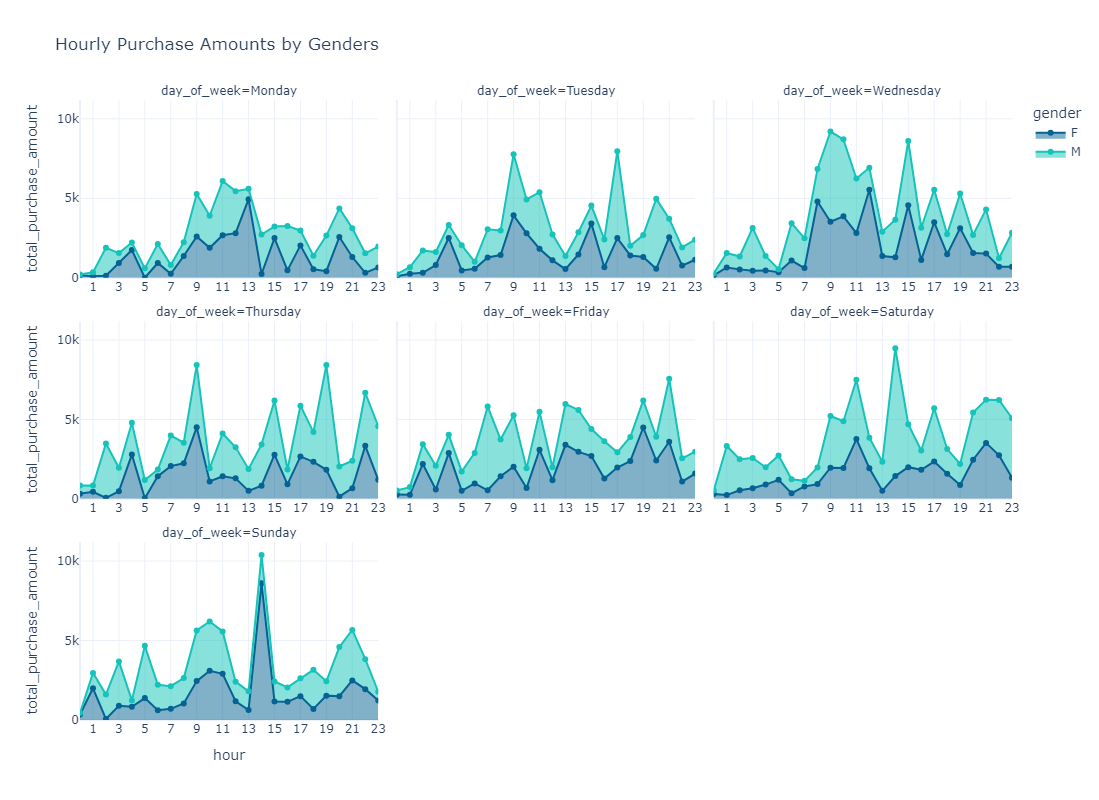

In [87]:
fig = px.area(gender_hour, x = "hour", y = "total_purchase_amount", 
              color = "gender", color_discrete_sequence = ['#056293','#15C3BA'], 
              facet_col = "day_of_week", facet_col_wrap = 3,
              markers = True, template = "plotly_white",
              category_orders = {"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]},
              title = "Hourly Purchase Amounts by Genders", 
              height = 800, width = 1000)

fig.update_layout(xaxis1_showticklabels=True, xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True, xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True, xaxis3_tickvals = np.arange(1, 24, 2),
                  xaxis4_showticklabels=True, xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels=True, xaxis5_tickvals = np.arange(1, 24, 2),
                  xaxis6_showticklabels=True, xaxis6_tickvals = np.arange(1, 24, 2),
                  xaxis7_showticklabels=True, xaxis7_tickvals = np.arange(1, 24, 2),
                  xaxis8_showticklabels=True, xaxis8_tickvals = np.arange(1, 24, 2),
                  xaxis9_showticklabels=True, xaxis9_tickvals = np.arange(1, 24, 2))

fig.show()

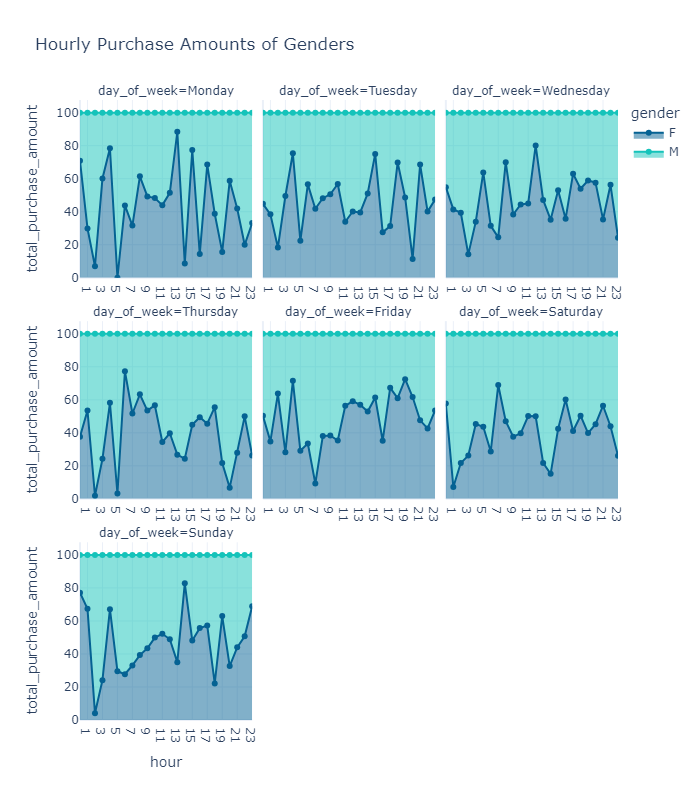

In [41]:
fig = px.area(gender_hour, x = "hour", y = "total_purchase_amount", groupnorm = "percent", 
              color = "gender", color_discrete_sequence = ['#056293','#15C3BA'], 
              facet_col = "day_of_week", facet_col_wrap = 3,
              markers = True, template = "plotly_white",
              category_orders = {"day_of_week": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]},
              title = "Hourly Purchase Amounts of Genders", 
              height = 800, width = 1000)

fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2),
                  xaxis4_showticklabels=True,xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels=True,xaxis5_tickvals = np.arange(1, 24, 2),
                  xaxis6_showticklabels=True,xaxis6_tickvals = np.arange(1, 24, 2),
                  xaxis7_showticklabels=True,xaxis7_tickvals = np.arange(1, 24, 2),
                  xaxis8_showticklabels=True,xaxis8_tickvals = np.arange(1, 24, 2),
                  xaxis9_showticklabels=True,xaxis9_tickvals = np.arange(1, 24, 2))

fig.show()

# <div style="padding: 20px;  color:white; margin:0; font-size: 90%; text-align:left; display:fill; border-radius: 10px; overflow: hidden; background-color:#2DA19B"> <b> Conclusion</b></div>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Purchases by Genders through Months</b> 
* The spending purchases of <b>both genders</b> were <b>similar</b> during three-month period.

<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Purchases by Genders through Days of Week</b> 
* <b>Males</b> spent more than <b>Females</b> on <b>all</b> days of week, especially on <b>Thursday</b> and <b>Saturday</b>.
* From <b>Mondays</b> to <b>Wednesdays</b> tended to share <b>similar</b> spending patterns.

<hr>

<b><span style='color:#15C3BA;text-align:center'>❯❯❯❯ </span> Hourly Purchases of by Genders</b>


# <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:#17202a "><b><span style='color:#15C3BA'>9 ❯</span></b> <b> Feature Correlation</b></div>

In [117]:
anz_salary["annual_salary"].describe()

count       100.000000
mean      68149.725004
std       27029.777881
min       29874.641667
25%       48042.082250
50%       60163.732000
75%       84385.001500
max      165331.440714
Name: annual_salary, dtype: float64

In [119]:
anz_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              100 non-null    object 
 1   card_present_flag   0 non-null      float64
 2   txn_description     100 non-null    object 
 3   merchant_id         0 non-null      float64
 4   merchant_code       100 non-null    float64
 5   first_name          100 non-null    object 
 6   balance             100 non-null    float64
 7   date                100 non-null    object 
 8   gender              100 non-null    object 
 9   age                 100 non-null    int64  
 10  merchant_suburb     0 non-null      float64
 11  merchant_state      0 non-null      float64
 12  amount              100 non-null    float64
 13  transaction_id      100 non-null    object 
 14  customer_id         100 non-null    object 
 15  movement            100 non-null    object 
 16  merchant_

In [181]:
numerics = anz_salary.select_dtypes(include = "number")
correlated_feature = numerics.corr().loc[:, "annual_salary"].to_frame()
correlated_feature = correlated_feature.sort_values(by = "annual_salary", ascending = False).iloc[1:, :]

correlated_feature

,annual_salary
amount,0.628591
balance,0.224043
day,0.068603
purchase_longitude,0.002288
month,-0.019239
purchase_latitude,-0.048859
age,-0.058951
hour,-0.096856
card_present_flag,NaN
merchant_id,NaN


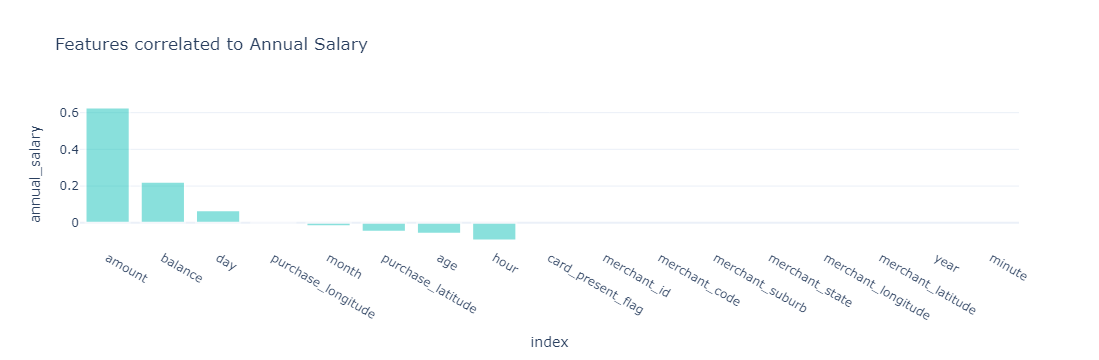

In [183]:
fig = px.bar(correlated_feature, y = "annual_salary", 
             template = "plotly_white", height = 500, 
             title = "Features correlated to Annual Salary")

fig.update_traces(marker_line_width = 2, selector=dict(type="bar"))
fig.update_traces(marker_color = '#15C3BA', opacity = 0.5)
fig.update_yaxes(matches = None)
fig.show()